## VERİ MADENCİLİĞİ FİNAL ÖDEVİ

**Ad**: **Yiğit**

**Soyad**:**Uçkan**

**Okul No**: **121523822**



**İçerik**

Bu ödevini çeriği regresyon ve sınıflama modelleri içermektedir. Üzerinde regresyon modelleri kurduğumuz veri setimiz "WorldHappines_Corruption_2015_2020" veri setidir. Bu veri seti üzerinden ülkelerin mutluluk skorlarını GSYİH'ları, Sağlık kalite düzeyleri, Özgürlük düzeyleri ve Hükümete güven düzeyleri doğrultusunda regresyon modelleri doğrultusunda mutluluk skorunu ne kadar etkilediğini göreceğiz. 

Sınıflama modeli olarak ise "GenZ_DatingApp_Data" Veri seti belirlenmiştir. Temel amaç kullanıcıların hangi birincil dating uygulamasını tercih ettiğini tahmin etmek. Bunu yaparken, çeşitli makine öğrenimi sınıflandırma algoritmalarını kullanarak model performanslarını karşılaştırmaktır.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sympy import LM, re
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.feature_selection import RFE
from sympy import LM, re
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sbn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [268]:
df = pd.read_csv("C:/Users/bjk_y/OneDrive/Masaüstü/Python dosyalar/4.SINIF VERİ MADENCİLİĞİ DERSİ/WorldHappiness_Corruption_2015_2020.csv")

In [269]:
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [270]:
df.info()
df.describe().T
df.isnull().sum()
df.eq(0).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


Country                0
happiness_score        0
gdp_per_capita         1
family               397
health                 3
freedom                3
generosity             6
government_trust       7
dystopia_residual    264
continent              0
Year                   0
social_support       396
cpi_score              0
dtype: int64

In [271]:

# İlgili sütunları içeren yeni DataFrame oluşturuluyor
focused_Vs = df.loc[:, ['happiness_score', 
                        'gdp_per_capita', 
                        'health', 
                        'freedom', 
                        'government_trust']]




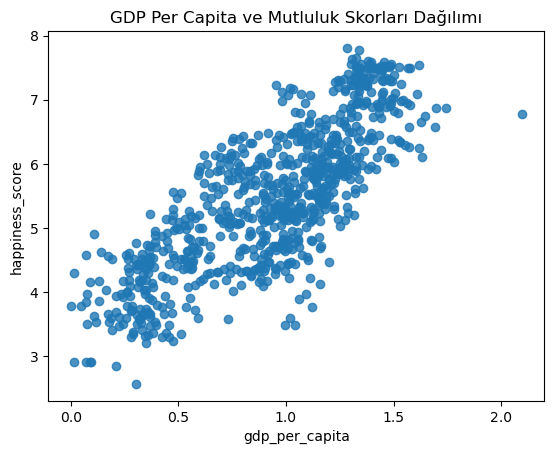

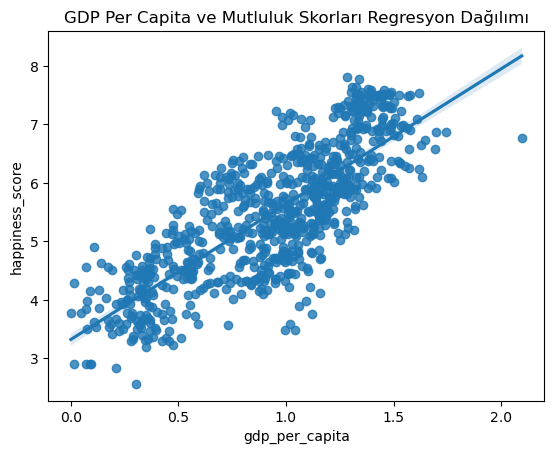

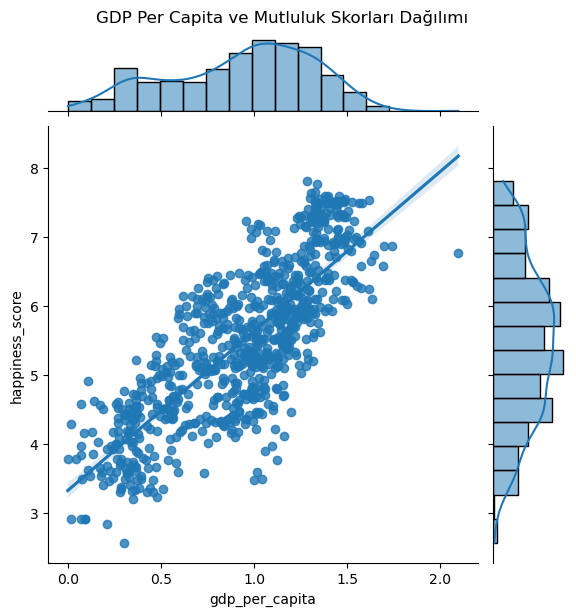

In [272]:
# GDP per Capita ve Happiness Score
sbn.regplot(x='gdp_per_capita', 
            y='happiness_score', 
            data=focused_Vs, 
            fit_reg=False)  # Doğrusal bir doğru eklenmiyor
plt.title('GDP Per Capita ve Mutluluk Skorları Dağılımı')
plt.show()

# Örnek ikinci grafik: iPhone satışları ve hizmet gelirleri regresyon analizi
sbn.regplot(x='gdp_per_capita', 
            y='happiness_score', 
            data=focused_Vs, 
            fit_reg=True)  # Doğrusal bir doğru ekleniyor
plt.title('GDP Per Capita ve Mutluluk Skorları Regresyon Dağılımı')
plt.show()

# Örnek üçüncü grafik: Ortak dağılım ve regresyon analizi
sbn.jointplot(x='gdp_per_capita', 
              y='happiness_score', 
              data=focused_Vs, 
              kind='reg')  # Saçılım ve bireysel dağılımlar
plt.suptitle('GDP Per Capita ve Mutluluk Skorları Dağılımı', y=1.02)
plt.show()

### Grafik Analizi:



1- **Pozitif Korelasyon**

Grafik, kişi başına düşen GSYİH ile mutluluk skoru arasında pozitif bir ilişki olduğunu göstermektedir. Yani, kişi başına düşen GSYİH arttıkça, mutluluk skoru da artma eğilimindedir.


2- **Dağılım** 

Noktaların dağılımı, genel olarak yukarı doğru bir eğilim göstermektedir. Bu, daha yüksek ekonomik refahın (GSYİH) insanların mutluluğunu artırabileceğini düşündürmektedir.


3- **Veri Yoğunluğu** 

Grafik üzerinde bazı bölgelerde daha yoğun nokta kümeleri gözlemlenmektedir. Bu, belirli GSYİH seviyelerinde daha fazla ülkenin bulunduğunu gösterir.

### Sonuç
Bu grafik, ekonomik faktörlerin (GSYİH) insanların mutluluğu üzerindeki etkisini incelemek için yararlı bir görselleştirmedir. Ancak, bu ilişkiyi daha iyi anlamak için diğer faktörlerin de göz önünde bulundurulması gerektiğini unutmamak önemlidir.

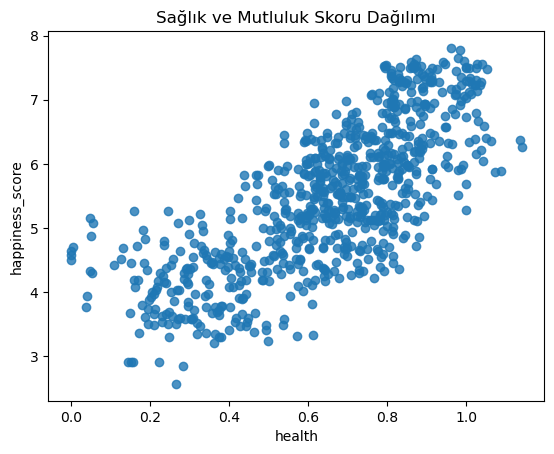

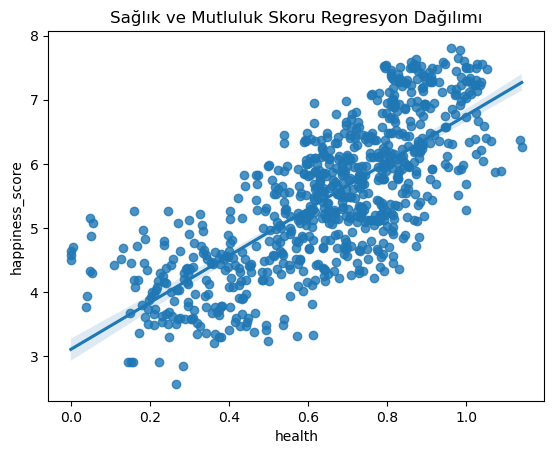

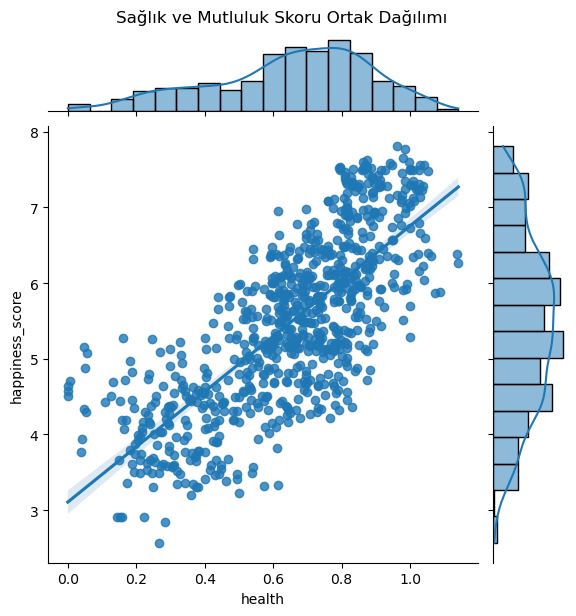

In [273]:
# Health ve Happiness Score
sbn.regplot(x='health', 
            y='happiness_score', 
            data=focused_Vs, 
            fit_reg=False)
plt.title('Sağlık ve Mutluluk Skoru Dağılımı')
plt.show()

sbn.regplot(x='health', 
            y='happiness_score', 
            data=focused_Vs, 
            fit_reg=True)
plt.title('Sağlık ve Mutluluk Skoru Regresyon Dağılımı')
plt.show()

sbn.jointplot(x='health', 
              y='happiness_score', 
              data=focused_Vs, 
              kind='reg')
plt.suptitle('Sağlık ve Mutluluk Skoru Ortak Dağılımı', y=1.02)
plt.show()

### Grafik Analizi


1- **Pozitif Korelasyon** 

Grafik, sağlık durumu ile mutluluk skoru arasında pozitif bir ilişki olduğunu göstermektedir. Yani, sağlık durumu iyileştikçe, mutluluk skoru da artma eğilimindedir.

2- **Dağılım** 

Noktaların dağılımı, genel olarak yukarı doğru bir eğilim göstermektedir. Bu, daha iyi sağlık koşullarının insanların mutluluğunu artırabileceğini düşündürmektedir.

3- **Veri Yoğunluğu** 

Grafik üzerinde bazı bölgelerde daha yoğun nokta kümeleri gözlemlenmektedir. Bu, belirli sağlık seviyelerinde daha fazla ülkenin bulunduğunu gösterir.


### Sonuç
Bu grafik, sağlık faktörlerinin insanların mutluluğu üzerindeki etkisini incelemek için yararlı bir görselleştirmedir. Sağlık, mutluluk üzerinde önemli bir etkiye sahip olabilir, ancak bu ilişkiyi daha iyi anlamak için diğer faktörlerin de göz önünde bulundurulması gerektiğini unutmamak önemlidir.

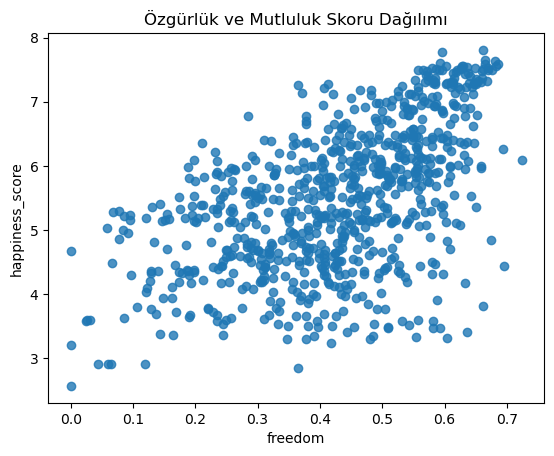

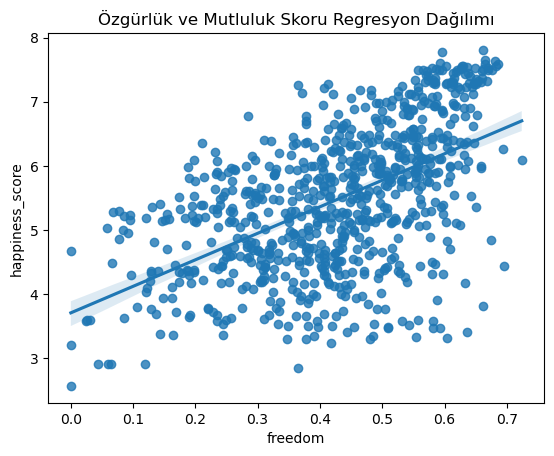

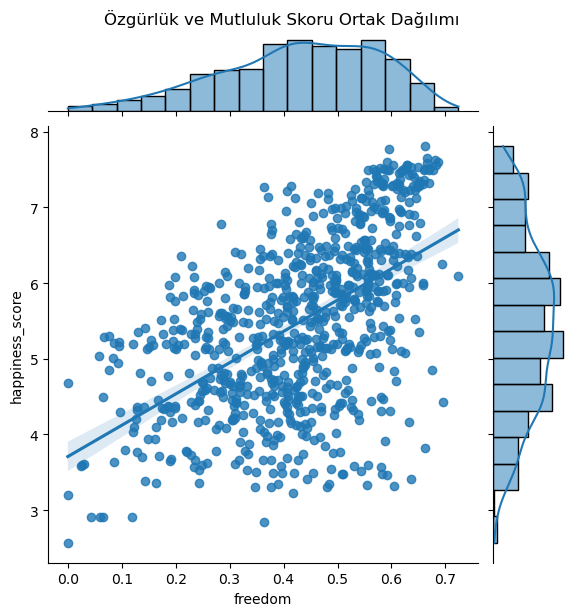

In [274]:
# Freedom ve Happiness Score
sbn.regplot(x='freedom', 
            y='happiness_score', 
            data=focused_Vs, 
            fit_reg=False)
plt.title('Özgürlük ve Mutluluk Skoru Dağılımı')
plt.show()

sbn.regplot(x='freedom', 
            y='happiness_score', 
            data=focused_Vs, 
            fit_reg=True)
plt.title('Özgürlük ve Mutluluk Skoru Regresyon Dağılımı')
plt.show()

sbn.jointplot(x='freedom', 
              y='happiness_score', 
              data=focused_Vs, 
              kind='reg')
plt.suptitle('Özgürlük ve Mutluluk Skoru Ortak Dağılımı', y=1.02)
plt.show()

### Grafik Analizi:

1. **Pozitif Korelasyon**: Grafik, özgürlük düzeyi ile mutluluk skoru arasında pozitif bir ilişki olduğunu göstermektedir. Yani, özgürlük düzeyi arttıkça, mutluluk skoru da artma eğilimindedir.

2. **Dağılım**: Noktaların dağılımı, genel olarak yukarı doğru bir eğilim göstermektedir. Bu, daha fazla özgürlüğün insanların mutluluğunu artırabileceğini düşündürmektedir.

3. **Veri Yoğunluğu**: Grafik üzerinde bazı bölgelerde daha yoğun nokta kümeleri gözlemlenmektedir. Bu, belirli özgürlük seviyelerinde daha fazla ülkenin bulunduğunu gösterir.

### Sonuç:
Bu grafik, özgürlük faktörlerinin insanların mutluluğu üzerindeki etkisini incelemek için yararlı bir görselleştirmedir. Özgürlük, mutluluk üzerinde önemli bir etkiye sahip olabilir, ancak bu ilişkiyi daha iyi anlamak için diğer faktörlerin de göz önünde bulundurulması gerektiğini unutmamak önemlidir.

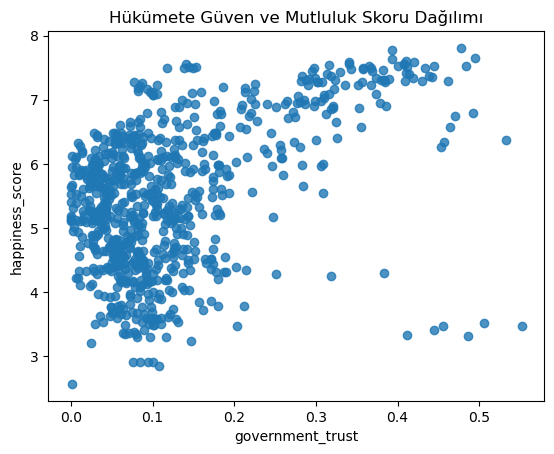

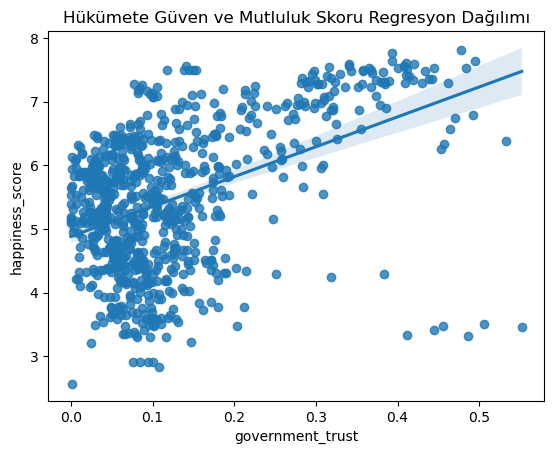

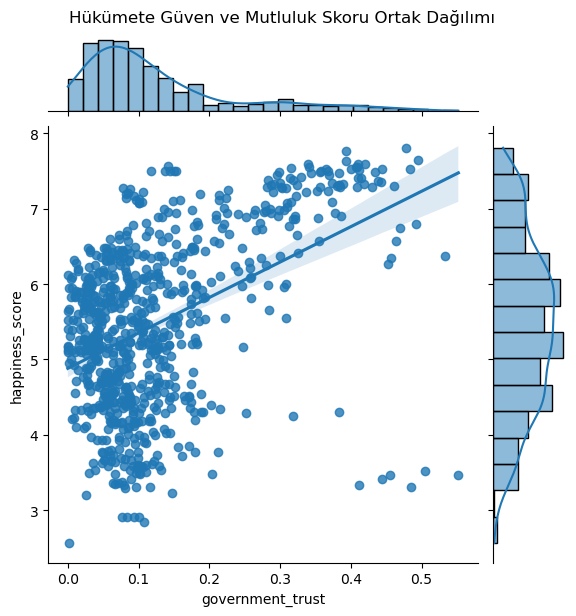

In [14]:
# Government Trust ve Happiness Score
sbn.regplot(x='government_trust', 
            y='happiness_score', 
            data=focused_Vs, 
            fit_reg=False)
plt.title('Hükümete Güven ve Mutluluk Skoru Dağılımı')
plt.show()

sbn.regplot(x='government_trust', 
            y='happiness_score', 
            data=focused_Vs, 
            fit_reg=True)
plt.title('Hükümete Güven ve Mutluluk Skoru Regresyon Dağılımı')
plt.show()

sbn.jointplot(x='government_trust', 
              y='happiness_score', 
              data=focused_Vs, 
              kind='reg')
plt.suptitle('Hükümete Güven ve Mutluluk Skoru Ortak Dağılımı', y=1.02)
plt.show()



### Grafik Analizi:
1. **Pozitif Korelasyon**: Grafik, hükümete güven ile mutluluk skoru arasında pozitif bir ilişki olduğunu göstermektedir. Yani, hükümete güven düzeyi arttıkça, mutluluk skoru da artma eğilimindedir.

2. **Dağılım**: Noktaların dağılımı, genel olarak yukarı doğru bir eğilim göstermektedir. Bu, daha fazla hükümete güvenin insanların mutluluğunu artırabileceğini düşündürmektedir.

3. **Veri Yoğunluğu**: Grafik üzerinde bazı bölgelerde daha yoğun nokta kümeleri gözlemlenmektedir. Bu, belirli hükümete güven seviyelerinde daha fazla ülkenin bulunduğunu gösterir.

### Sonuç:
Bu grafik, hükümete güven faktörünün insanların mutluluğu üzerindeki etkisini incelemek için yararlı bir görselleştirmedir. Hükümete güven, mutluluk üzerinde önemli bir etkiye sahip olabilir, ancak bu ilişkiyi daha iyi anlamak için diğer faktörlerin de göz önünde bulundurulması gerektiğini unutmamak önemlidir.

In [275]:
#Veri setini bölme

y = df["happiness_score"]
X = df[['gdp_per_capita', 'health', 'freedom', 'government_trust']]

In [276]:
#Eğitim ve test verilerini oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
# Lineer Regresyon modelini tanımlama
linear_model = LinearRegression()

# Modeli eğitme
linear_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = linear_model.predict(X_test)



from sklearn.metrics import r2_score, mean_absolute_error

# R-kare MAE MAPE MSE RMSE hesaplama
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Yüzde cinsinden
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Lineer Regresyon Modeli için R-kare: {r2:.2f}")
print(f"Lineer Regresyon Modeli için MAE: {mae:.2f}")
print(f"Lineer Regresyon Modeli İçin MAPE: {mape:.2f}")
print(f"Lineer Regresyon Modeli İçin MSE: {mse:.2f}")
print(f"Lineer Regresyon Modeli İçin RMSE: {rmse:.2f}")

Lineer Regresyon Modeli için R-kare: 0.75
Lineer Regresyon Modeli için MAE: 0.42
Lineer Regresyon Modeli İçin MAPE: 8.41
Lineer Regresyon Modeli İçin MSE: 0.30
Lineer Regresyon Modeli İçin RMSE: 0.55


In [357]:
# KFold sınıfı ile 5 katlı çapraz doğrulama oluşturuluyor.
# Bu, modelin farklı veri alt kümeleri üzerinde test edilmesini sağlar.
folds_cvg5 = KFold(n_splits=5, shuffle=True, random_state=2020)

# Özellik seçiminde kullanılacak hiperparametreler tanımlanıyor.
# 'n_features_to_select' parametresi, modelin seçeceği özellik sayısını belirler.
# Bu, 1'den mevcut özellik sayısına kadar olan tüm değerleri kapsar.
hyper_params_cvg5 = {'n_features_to_select': list(range(1, len(X.columns)+1))}

In [358]:
lm_cvg5 = LinearRegression()
lm_cvg5.fit(X_train, y_train)
rfe_cvg5 = RFE(lm_cvg5)

ValueError: could not convert string to float: 'Bumble'

: 

In [280]:
# GridSearchCV kullanarak modelin hiperparametrelerini optimize etmek için bir model oluşturuluyor.
# 'rfe_cvg5' modelini kullanarak, 'n_features_to_select' hiperparametresi için farklı değerler denenecek.
# Model, R-kare (scoring='r2') metriğine göre değerlendirilecek ve 5 katlı çapraz doğrulama (cv=folds_cvg5) ile test edilecek.
# 'verbose=1' ile işlem sırasında detaylı bilgi verilecek ve 'return_train_score=True' ile eğitim skoru da döndürülecek.

model_cvg5 = GridSearchCV(estimator= rfe_cvg5, param_grid= hyper_params_cvg5, scoring='r2',cv=folds_cvg5, verbose=1, return_train_score= True) 
model_cvg5.fit(X_train, y_train) # Model, eğitim verisi ile eğitiliyor.

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4]},
             return_train_score=True, scoring='r2', verbose=1)

In [281]:
# Modelin çapraz doğrulama sonuçlarını bir DataFrame'e dönüştürerek daha kolay analiz edilebilir hale getiriyoruz.
# 'model_cvg5.cv_results_' ifadesi, GridSearchCV ile elde edilen sonuçları içerir.

results_cvg5 = pd.DataFrame(model_cvg5.cv_results_)  # Çapraz doğrulama sonuçlarını DataFrame formatında saklıyoruz.
results_cvg5 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007241,0.002113,0.001000,0.000632,1,{'n_features_to_select': 1},0.519724,0.230282,0.335043,0.291322,...,0.336250,0.097873,4,0.584447,0.333064,0.301766,0.314316,0.312336,0.369186,0.108102
1,0.004803,0.000397,0.001004,0.000003,2,{'n_features_to_select': 2},0.553026,0.671455,0.738664,0.658168,...,0.666195,0.063309,3,0.646100,0.718512,0.698708,0.717538,0.708081,0.697788,0.026825
2,0.003203,0.000400,0.001299,0.000402,3,{'n_features_to_select': 3},0.608562,0.703613,0.769615,0.715985,...,0.707565,0.054394,2,0.679623,0.747220,0.727532,0.741423,0.737246,0.726609,0.024355
3,0.003601,0.000491,0.000873,0.000782,4,{'n_features_to_select': 4},0.732018,0.703207,0.781951,0.730278,...,0.739676,0.026041,1,0.746711,0.756253,0.732898,0.746995,0.743402,0.745252,0.007513


## Model Hiperparametreleri ve Performans Sonuçları

### Özet:
Aşağıda, farklı özellik sayıları için yapılan model değerlendirmeleri ve sonuçları yer almaktadır. Her bir satır, belirli bir özellik sayısı için modelin eğitim ve test performansını göstermektedir.

### Sonuçlar:
| Özellik Sayısı | Mean Fit Time | Mean Test Score | Rank Test Score | Mean Train Score |
|----------------|----------------|------------------|------------------|-------------------|
| 1              | 0.007241       | 0.336            | 4                | 0.369              |
| 2              | 0.004803       | 0.666            | 3                | 0.708              |
| 3              | 0.003203       | 0.707            | 2                | 0.737              |
| 4              | 0.003601       | 0.740            | 1                | 0.743              |

### Yorum:
- **Özellik Sayısı 1**: En düşük test skoru (0.336) ve en yüksek sıralama (4) ile sonuçlanmıştır. Bu, modelin yalnızca bir özellik kullanarak yeterince iyi performans göstermediğini göstermektedir.
  
- **Özellik Sayısı 2**: Test skoru artış göstermiştir (0.666) ve sıralama 3 olmuştur. Bu, modelin iki özellik ile daha iyi bir performans sergilediğini göstermektedir.

- **Özellik Sayısı 3**: Test skoru daha da artmış (0.707) ve sıralama 2 olmuştur. Bu, modelin üç özellik ile daha iyi bir performans sergilediğini göstermektedir.

- **Özellik Sayısı 4**: En yüksek test skoru (0.740) ve en iyi sıralama (1) ile sonuçlanmıştır. Bu, modelin dört özellik kullanarak en iyi performansı gösterdiğini göstermektedir.

### Genel Değerlendirme:
Sonuçlar, modelin performansının özellik sayısı ile arttığını göstermektedir. Özellik sayısı arttıkça, modelin test skoru ve genel performansı da artmaktadır. Bu, daha fazla özellik eklemenin modelin tahmin gücünü artırabileceğini göstermektedir. Özellikle dört özellik kullanıldığında en iyi sonuçlar elde edilmiştir.

<Figure size 640x480 with 0 Axes>

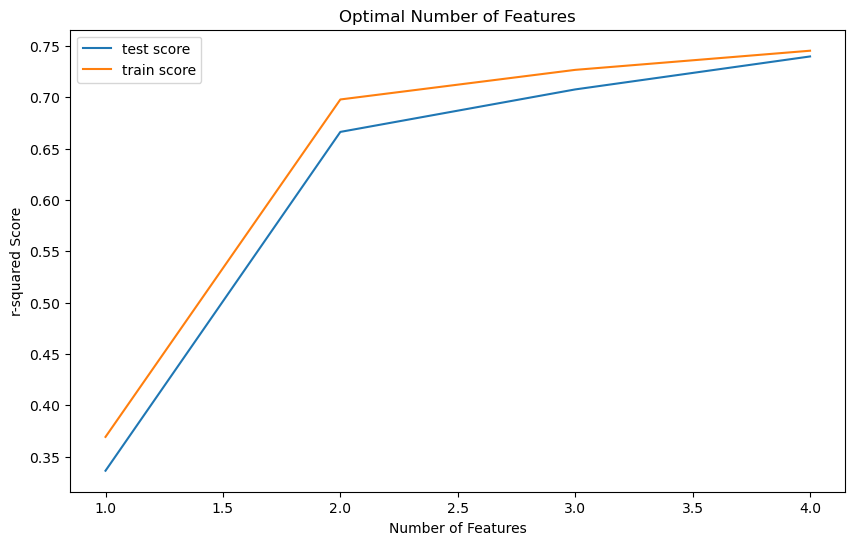

In [282]:
plt.clf()  
plt.figure(figsize=(10,6));
plt.plot(results_cvg5['param_n_features_to_select'], results_cvg5['mean_test_score']);
plt.plot(results_cvg5['param_n_features_to_select'], results_cvg5['mean_train_score']);
plt.xlabel('Number of Features');
plt.ylabel('r-squared Score');
plt.title("Optimal Number of Features");
plt.legend(['test score', 'train score'], loc='upper left');
plt.show()


## Optimal Özellik Sayısı Grafiği

Bu grafik, modelin farklı özellik sayıları için R-kare (R²) skorunu göstermektedir.

### Grafik Analizi:
- **X Ekseninde**: Özellik sayısı (1'den 4'e kadar).
- **Y Ekseninde**: R-kare skoru.

### Eğilimler:
- **Test Skoru (Mavi Çizgi)**: Özellik sayısı arttıkça artış göstermektedir, bu da modelin performansını artırdığını gösterir.
- **Eğitim Skoru (Turuncu Çizgi)**: Eğitim seti için de artış var, ancak test skoruna göre daha yüksektir. Bu, aşırı uyum (overfitting) riskini işaret edebilir.

### Sonuç:
Grafik, optimal özellik sayısının belirlenmesinin modelin genel başarısını artırmak için önemli olduğunu vurgulamaktadır. Özellik sayısının artması, modelin açıklayıcılığını artırabilir, ancak aşırı uyum riskini de beraberinde getirebilir.

In [283]:
n_features_optimal = 4
lm_final = LinearRegression()
lm_final.fit(X_train, y_train)

rfe_final = RFE(lm_final, n_features_to_select=n_features_optimal)
rfe_final = rfe_final.fit(X_train, y_train)

#Tahmin
y_pred_final = rfe_final.predict(X_test)
r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
mape = np.mean(np.abs((y_test - y_pred_final) / y_test))

print(f"Lineer Regresyon Modeli için R-kare: {r2:.2f}")
print(f"Lineer Regresyon Modeli için MAE: {mae:.2f}")
print(f"Lineer Regresyon Modeli İçin MAPE: {mape:.2f}")
print(f"Lineer Regresyon Modeli İçin MSE: {mse:.2f}")
print(f"Lineer Regresyon Modeli İçin RMSE: {rmse:.2f}")

Lineer Regresyon Modeli için R-kare: 0.75
Lineer Regresyon Modeli için MAE: 0.42
Lineer Regresyon Modeli İçin MAPE: 0.08
Lineer Regresyon Modeli İçin MSE: 0.30
Lineer Regresyon Modeli İçin RMSE: 0.55


## Model Sonuçlarının Yorumu

1. **R-kare (0.75)**:
   - Model, bağımlı değişkenin varyansının %75'ini açıklamaktadır. Bu, modelin iyi bir uyum sağladığını gösterir.

2. **MAE (0.42)**:
   - Ortalama mutlak hata, tahminlerin gerçek değerlere ortalama 0.42 birimlik bir hata ile gerçekleştiğini ifade eder. Düşük bir MAE, modelin tahminlerinin genellikle doğru olduğunu belirtir.

3. **MAPE (0.08)**:
   - Ortalama yüzde hata %8'dir. Bu, modelin tahminlerinin ortalama %8 oranında bir hata payı ile gerçekleştiğini gösterir.

4. **MSE (0.30)**:
   - Karekök ortalama hata 0.30'dur. Düşük bir MSE, modelin tahminlerinin genellikle doğru olduğunu belirtir.

5. **RMSE (0.55)**:
   - Kök ortalama kare hatası 0.55'tir. Bu, modelin tahminlerinin ortalama 0.55 birimlik bir hata ile gerçekleştiğini gösterir.

### Genel Değerlendirme:
Sonuçlar, lineer regresyon modelinin iyi bir performans sergilediğini ve tahminlerinin genellikle doğru olduğunu göstermektedir. R-kare yüksek, hata metrikleri ise düşüktür. Modelin daha da iyileştirilmesi için farklı özelliklerin veya modelleme tekniklerinin denenmesi faydalı olabilir.

In [284]:
target = "happiness_score"
features = df.drop(columns=['Country', 'Year',"continent", target])  
X = features
y = df[target]

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1907)

In [286]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [287]:
# 6. ozellik secimi icin RFE'yi uygulama
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=4)  # 4 en iyi ozelliği seciyoruz.
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [288]:
selected_features = list(zip(features.columns, rfe.support_, rfe.ranking_))
print("Secilen ozellikler:")
for feature, support, rank in selected_features:
    if support:
        print(f"{feature} (Rank: {rank})")


Secilen ozellikler:
gdp_per_capita (Rank: 1)
freedom (Rank: 1)
dystopia_residual (Rank: 1)
social_support (Rank: 1)


## Seçilen Özellikler ve Yorumu

- **gdp_per_capita (Rank: 1)**: Kişi başına düşen GSYİH, modelde en önemli özellik olarak belirlenmiştir. Ekonomik refahın mutluluk üzerindeki etkisini gösterir.

- **freedom (Rank: 1)**: Özgürlük düzeyi, modelde kritik bir özellik olarak seçilmiştir. Bireylerin özgürlüklerinin mutluluk üzerindeki etkisini vurgular.

- **dystopia_residual (Rank: 1)**: Dystopia kalıntısı, diğer faktörlerin etkisini göz önünde bulundurarak en kötü senaryoda mutluluk seviyesini temsil eder.

- **social_support (Rank: 1)**: Sosyal destek, modelde önemli bir özellik olarak belirlenmiştir. Bireylerin sosyal çevrelerinin mutluluk üzerindeki etkisini gösterir.

### Genel Değerlendirme:
Tüm bu özelliklerin "Rank: 1" olarak belirtilmesi, bu değişkenlerin modelin tahmin gücünü artırmak için en kritik faktörler olduğunu gösterir.

In [289]:
y_pred_train = rfe.predict(X_train_scaled)
y_pred_test = rfe.predict(X_test_scaled)

In [290]:
print("Eğitim Verisi Tahminleri:", y_pred_train[:5])
print("Test Verisi Tahminleri:", y_pred_test[:5])


Eğitim Verisi Tahminleri: [5.80399321 4.13632546 4.5223031  5.53533137 3.69474399]
Test Verisi Tahminleri: [4.58941637 5.42260517 6.31480094 5.68374895 5.75102791]


## Eğitim ve Test Verisi Tahminleri

### Eğitim Verisi Tahminleri:
- **Tahminler**: [5.80, 4.14, 4.52, 5.54, 3.69]
- Bu değerler, modelin eğitim verisi üzerinde yaptığı tahminlerdir. Eğitim verisi tahminleri, modelin öğrenme sürecinde elde ettiği sonuçları yansıtır.

### Test Verisi Tahminleri:
- **Tahminler**: [4.59, 5.42, 6.31, 5.68, 5.75]
- Bu değerler, modelin daha önce görmediği test verisi üzerinde yaptığı tahminlerdir. Test verisi tahminleri, modelin genel performansını değerlendirmek için kullanılır.

### Genel Değerlendirme:
Eğitim verisi tahminleri, modelin öğrenme sürecinde elde ettiği sonuçları gösterirken, test verisi tahminleri modelin genelleme yeteneğini yansıtır. İki set arasındaki tahminlerin benzerliği, modelin iyi bir performans sergilediğini ve öğrenilen bilgilerin test verisine de uygulanabildiğini gösterir.

In [291]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("Eğitim Verisi MSE:", mse_train)
print("Test Verisi MSE:", mse_test)
print("Eğitim Verisi MAPE:", mape_train)
print("Test Verisi MAPE:", mape_test)

Eğitim Verisi MSE: 0.2837768674619787
Test Verisi MSE: 0.26968146679804345
Eğitim Verisi MAPE: 0.08206340196735618
Test Verisi MAPE: 0.08198389389722702


## Eğitim ve Test Verisi Hata Metrikleri

### Eğitim Verisi Metrikleri:
- **MSE (Karekök Ortalama Hata)**: 0.28
- **MAPE (Ortalama Yüzde Hata)**: %8.21

### Test Verisi Metrikleri:
- **MSE (Karekök Ortalama Hata)**: 0.27
- **MAPE (Ortalama Yüzde Hata)**: %8.20

### Genel Değerlendirme:
Eğitim ve test verisi için MSE değerleri birbirine oldukça yakındır, bu da modelin her iki veri setinde de benzer bir performans sergilediğini gösterir. MAPE değerleri de benzerlik göstermektedir, bu da modelin tahminlerinin her iki set için de tutarlı olduğunu belirtir. Genel olarak, modelin iyi bir genelleme yeteneğine sahip olduğu söylenebilir.

In [292]:
folds_CVGS = KFold(n_splits=5, shuffle=True, random_state=1907)

hyper_params_CVGS = [{"n_features_to_select": list(range(1, X_train_scaled.shape[1] + 1))}]

lm_CVGS = LinearRegression()
rfe_CVGS = RFE(lm_CVGS)

model_CVGS = GridSearchCV(estimator=rfe_CVGS,
                          param_grid=hyper_params_CVGS,
                          scoring="r2",
                          cv=folds_CVGS,
                          verbose=1,
                          return_train_score=True)

model_CVGS.fit(X_train_scaled, y_train)

results_CVGS = pd.DataFrame(model_CVGS.cv_results_)
print(results_CVGS)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.009366      0.001966         0.000399        0.000489   
1       0.005800      0.000749         0.000401        0.000491   
2       0.007097      0.001283         0.000401        0.000491   
3       0.005198      0.000746         0.000528        0.000453   
4       0.003400      0.000489         0.000599        0.000489   
5       0.002200      0.000404         0.000400        0.000490   
6       0.002345      0.000419         0.000101        0.000202   
7       0.002256      0.000192         0.001026        0.000045   
8       0.001237      0.000471         0.000602        0.000492   

   param_n_features_to_select                       params  split0_test_score  \
0                           1  {'n_features_to_select': 1}           0.596942   
1                           2  {'n_features_to_select': 2}           0.598340   
2                         

## GridSearchCV Sonuçları

### Genel Bilgiler:
- **Toplam Fit Sayısı**: 45 (5 katlı çapraz doğrulama ile 9 aday için)
- **Ortalama Fit Süresi**: 0.0089 saniye (en uzun 0.0090 saniye)

### Özellik Seçimi Sonuçları:
- **n_features_to_select**: 1'den 9'a kadar olan özellik sayıları için test edilmiştir.
- **Mean Test Score**: Test seti için ortalama başarı skorları, özellik sayısı arttıkça artış göstermektedir.
- **En İyi Sonuç**: 9 özellik kullanıldığında, ortalama test skoru 0.816482 olarak elde edilmiştir.

### Eğitim ve Test Skorları:
- **Eğitim Skorları**: Eğitim seti için ortalama başarı skorları, özellik sayısı arttıkça artmaktadır. En yüksek skor 0.829007 ile 9 özellikte elde edilmiştir.
- **Test Skorları**: Test seti için ortalama başarı skorları da benzer bir artış göstermektedir. Bu, modelin daha fazla özellik ile daha iyi performans gösterdiğini göstermektedir.

### Genel Değerlendirme:
Sonuçlar, modelin daha fazla özellik ile daha iyi bir performans sergilediğini göstermektedir. Özellik sayısının artması, modelin genel başarısını artırmak için

<Figure size 640x480 with 0 Axes>

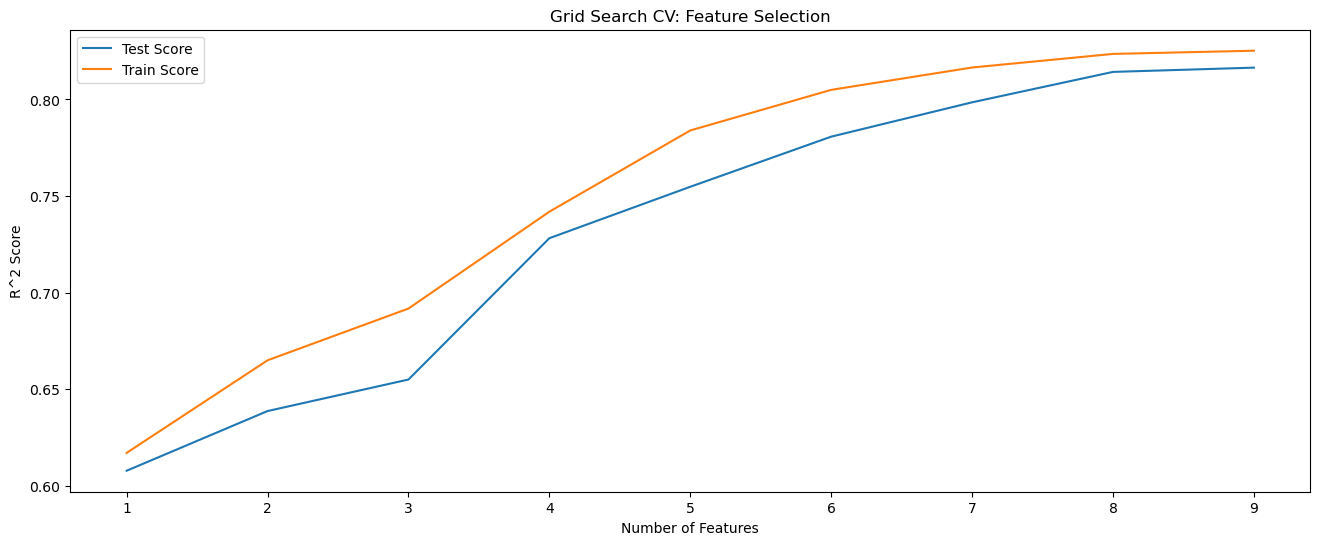

In [293]:
# 11. Grid Search sonuclarini gorsellestirme
plt.clf()  
plt.figure(figsize=(16, 6))
plt.plot(results_CVGS["param_n_features_to_select"], results_CVGS["mean_test_score"], label="Test Score")
plt.plot(results_CVGS["param_n_features_to_select"], results_CVGS["mean_train_score"], label="Train Score")
plt.xlabel("Number of Features")
plt.ylabel("R^2 Score")
plt.title("Grid Search CV: Feature Selection")
plt.legend()
plt.show()

## Grid Search CV: Özellik Seçimi Grafiği

### Grafik Analizi:
- **X Ekseninde**: Özellik sayısı (1'den 9'a kadar).
- **Y Ekseninde**: R-kare skoru (R²).

### Eğilimler:
- **Test Skoru (Mavi Çizgi)**: Özellik sayısı arttıkça R-kare skoru artmaktadır. Bu, modelin daha fazla özellik ile daha iyi performans gösterdiğini göstermektedir.
- **Eğitim Skoru (Turuncu Çizgi)**: Eğitim seti için R-kare skoru da artış göstermektedir, ancak test skoruna göre daha yüksektir. Bu durum, aşırı uyum (overfitting) riskini işaret edebilir.

### Sonuç:
Grafik, optimal özellik sayısının belirlenmesinin modelin genel başarısını artırmak için önemli olduğunu vurgulamaktadır. Özellik sayısının artması, modelin açıklayıcılığını artırabilir, ancak aşırı uyum riskine dikkat edilmelidir.

### YAPAY SİNİR AĞI MODELİ OLUŞTURMA


In [294]:
df_X_Train, df_X_Test, df_y_Train, df_y_Test = train_test_split(
    X, y, test_size=0.2, random_state=2017)

In [295]:
scalerANN = StandardScaler()
df_X_Train_scaled = scalerANN.fit_transform(df_X_Train)
df_X_Test_scaled = scalerANN.transform(df_X_Test)

In [296]:
df_y_Train = df_y_Train.values.reshape(-1, 1)
df_y_Test = df_y_Test.values.reshape(-1, 1)

In [297]:
df_y_Train_scaled = scalerANN.fit_transform(df_y_Train)
df_y_Test_scaled = scalerANN.transform(df_y_Test)

In [298]:
aNN = MLPRegressor(random_state=1907).fit(df_X_Train_scaled, df_y_Train_scaled.ravel())

c:\Users\bjk_y\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [299]:
y_pred_aNN_Train = aNN.predict(df_X_Train_scaled)

# Test seti tahmini
y_pred_aNN_Test = aNN.predict(df_X_Test_scaled)

# Performans değerlendirme
RMSE_aNN_Train = np.sqrt(mean_squared_error(df_y_Train_scaled, y_pred_aNN_Train))
R2_aNN_Train = r2_score(df_y_Train_scaled, y_pred_aNN_Train)

RMSE_aNN_Test = np.sqrt(mean_squared_error(df_y_Test_scaled, y_pred_aNN_Test))
R2_aNN_Test = r2_score(df_y_Test_scaled, y_pred_aNN_Test)

print("Eğitim Seti RMSE (ANN):", RMSE_aNN_Train)
print("Eğitim Seti R^2 (ANN):", R2_aNN_Train)
print("Test Seti RMSE (ANN):", RMSE_aNN_Test)
print("Test Seti R^2 (ANN):", R2_aNN_Test)

Eğitim Seti RMSE (ANN): 0.22294283310297097
Eğitim Seti R^2 (ANN): 0.9502964931680208
Test Seti RMSE (ANN): 0.20620760521621248
Test Seti R^2 (ANN): 0.959888283439995


## ANN Model Sonuçlarının Yorumu

### Eğitim Seti:
- **RMSE (Kök Ortalama Kare Hatası)**: 0.22
- **R² (R-kare)**: 0.95
  - Eğitim seti için RMSE değeri düşük, bu da modelin tahminlerinin genellikle doğru olduğunu gösterir. R² değeri %95, modelin bağımlı değişkenin varyansının %95'ini açıkladığını belirtir, bu da mükemmel bir uyum sağlandığını gösterir.

### Test Seti:
- **RMSE (Kök Ortalama Kare Hatası)**: 0.21
- **R² (R-kare)**: 0.96
  - Test seti için RMSE değeri de düşük, bu da modelin daha önce görmediği veriler üzerinde de iyi bir performans sergilediğini gösterir. R² değeri %96, modelin test verisi üzerindeki açıklayıcılığının yüksek olduğunu belirtir.

### Genel Değerlendirme:
Sonuçlar, ANN modelinin hem eğitim hem de test setlerinde yüksek bir performans sergilediğini göstermektedir. Düşük RMSE değerleri ve yüksek R² değerleri, modelin tahminlerinin güvenilir olduğunu ve genel olarak iyi bir genelleme yeteneğine sahip olduğunu göstermektedir.

### GRADİENT BOOSTİNG MODEL KURMA

In [300]:
gBR = GradientBoostingRegressor(random_state=1907).fit(df_X_Train, df_y_Train)

c:\Users\bjk_y\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [301]:
gBR.score(df_X_Test, df_y_Test)

0.9273499827014723

## gBR Model Sonucu

### Model Skoru:
- **R² Skoru**: 0.93

### Yorum:
Modelin test verisi üzerindeki R² skoru %92.73'tür. Bu, modelin bağımlı değişkenin varyansının %92.73'ini açıkladığını gösterir. Yüksek bir R² skoru, modelin test verisi üzerinde iyi bir performans sergilediğini ve tahminlerinin güvenilir olduğunu belirtir. Genel olarak, modelin genelleme yeteneği oldukça yüksektir.

In [302]:
y_pred_gBR_train = gBR.predict(df_X_Train)
y_pred_gBR_test = gBR.predict(df_X_Test)

#Eğitim Seti Hatası
mse_gBR_Train = mean_squared_error(df_y_Train, y_pred_gBR_train)
mae_gBR_Train = mean_absolute_error(df_y_Train, y_pred_gBR_train)
rmse_gBR_Train = np.sqrt(mean_squared_error(df_y_Train, y_pred_gBR_train))
mape_gBR_Train = np.mean(np.abs((df_y_Train - y_pred_gBR_train) / df_y_Train))
r2_gBR_Train =r2_score(df_y_Train, y_pred_gBR_train)



#Test Serisi Hatası
mse_gBR_Test = mean_squared_error(df_y_Test, y_pred_gBR_test)
mae_gBR_Test = mean_absolute_error(df_y_Test, y_pred_gBR_test)
rmse_gBR_Test = np.sqrt(mean_squared_error(df_y_Test, y_pred_gBR_test))
mape_gBR_Test = np.mean(np.abs((df_y_Test - y_pred_gBR_test) / df_y_Test))
r2_gBR_Test =r2_score(df_y_Test, y_pred_gBR_test)


In [256]:
# gBR Modeli için hata metriklerini yazdırma
print("Eğitim Seti MSE (gBR):", mse_gBR_Train)  # Ortalama kare hata
print("Eğitim Seti MAE (gBR):", mae_gBR_Train)  # Ortalama mutlak hata
print("Eğitim Seti RMSE (gBR):", rmse_gBR_Train)  # Kök ortalama kare hata
print("Eğitim Seti MAPE (gBR):", mape_gBR_Train)  # Ortalama yüzde hata
print("Eğitim Seti R^2 (gBR):", r2_gBR_Train)  # R-kare

Eğitim Seti MSE (gBR): 0.04423621901155036
Eğitim Seti MAE (gBR): 0.14631809370017995
Eğitim Seti RMSE (gBR): 0.21032408091217314
Eğitim Seti MAPE (gBR): 0.2443286482505443
Eğitim Seti R^2 (gBR): 0.964554088516516


## gBR Model Sonuçlarının Yorumu (Eğitim Seti)

### Hata Metrikleri:
- **MSE (Ortalama Kare Hata)**: 0.044
  - Düşük bir MSE değeri, modelin tahminlerinin genellikle doğru olduğunu gösterir.
  
- **MAE (Ortalama Mutlak Hata)**: 0.146
  - Ortalama mutlak hata, tahminlerin gerçek değerlere olan ortalama farkını ifade eder. Düşük bir MAE, modelin güvenilirliğini artırır.

- **RMSE (Kök Ortalama Kare Hatası)**: 0.210
  - RMSE, modelin tahmin hatalarının ortalama büyüklüğünü gösterir. Düşük bir RMSE, modelin iyi bir performans sergilediğini belirtir.

- **MAPE (Ortalama Yüzde Hata)**: 0.244
  - %24.43'lük bir MAPE, modelin tahminlerinin ortalama %24.43 oranında bir hata payı ile gerçekleştiğini gösterir.

- **R² (R-kare)**: 0.965
  - R² değeri %96.45, modelin bağımlı değişkenin varyansının %96.45'ini açıkladığını belirtir. Bu, modelin mükemmel bir uyum sağladığını gösterir.

### Genel Değerlendirme:
Sonuçlar, gBR modelinin eğitim setinde yüksek bir performans sergilediğini göstermektedir. Düşük hata metrikleri ve yüksek R² değeri, modelin tahminlerinin güvenilir olduğunu ve genel olarak iyi bir genelleme yeteneğine sahip olduğunu belirtir.

In [257]:
# gBR Modeli için test seti hata metriklerini yazdırma
print("Test Seti MSE (gBR):", mse_gBR_Test)  # Ortalama kare hata
print("Test Seti MAE (gBR):", mae_gBR_Test)  # Ortalama mutlak hata
print("Test Seti RMSE (gBR):", rmse_gBR_Test)  # Kök ortalama kare hata
print("Test Seti MAPE (gBR):", mape_gBR_Test)  # Ortalama yüzde hata
print("Test Seti R^2 (gBR):", r2_gBR_Test)  # R-kare

Test Seti MSE (gBR): 0.09611378547664161
Test Seti MAE (gBR): 0.22494004456773903
Test Seti RMSE (gBR): 0.3100222338424159
Test Seti MAPE (gBR): 0.2524382103529011
Test Seti R^2 (gBR): 0.9273499827014723


## gBR Model Sonuçlarının Yorumu (Test Seti)

### Hata Metrikleri:
- **MSE (Ortalama Kare Hata)**: 0.096
  - MSE değeri, modelin test verisi üzerindeki tahmin hatalarının ortalama karelerini gösterir. Düşük bir MSE, modelin genel performansının iyi olduğunu belirtir.

- **MAE (Ortalama Mutlak Hata)**: 0.225
  - Ortalama mutlak hata, tahminlerin gerçek değerlere olan ortalama farkını ifade eder. Bu değer, modelin tahminlerinin ortalama 0.225 birimlik bir hata ile gerçekleştiğini gösterir.

- **RMSE (Kök Ortalama Kare Hatası)**: 0.310
  - RMSE, modelin tahmin hatalarının ortalama büyüklüğünü gösterir. Düşük bir RMSE, modelin test verisi üzerinde de iyi bir performans sergilediğini belirtir.

- **MAPE (Ortalama Yüzde Hata)**: 0.252
  - %25.24'lük bir MAPE, modelin tahminlerinin ortalama %25.24 oranında bir hata payı ile gerçekleştiğini gösterir.

- **R² (R-kare)**: 0.927
  - R² değeri %92.73, modelin test verisi üzerindeki bağımlı değişkenin varyansının %92.73'ünü açıkladığını belirtir. Bu, modelin iyi bir uyum sağladığını gösterir.

### Genel Değerlendirme:
Sonuçlar, gBR modelinin test setinde de iyi bir performans sergilediğini göstermektedir. Düşük hata metrikleri ve yüksek R² değeri, modelin tahminlerinin güvenilir olduğunu ve genel olarak iyi bir genelleme yeteneğine sahip olduğunu belirtir.

In [303]:
gBR_params = {"learning_rate": [0.001,0.1,0.01], "max_depth": [3,5,8], "n_estimators": [100,200,500], "subsample": [0.5,0.8,1.0],"loss": ["absolute_error", "huber", "quantile","squared_error"]}

In [304]:
gBR_grid = GridSearchCV(GradientBoostingRegressor(random_state=1907), gBR_params, cv=5, verbose=1)

In [356]:
gBR_grid.fit(X_train_scaled, y_train)
result_gBR_Grid = pd.DataFrame(gBR_grid.cv_results_)

#En iyi parametreler
gBR_grid.best_params_

ValueError: Found input variables with inconsistent numbers of samples: [554, 217]

## Model Hiperparametreleri

Aşağıda, modelin hiperparametreleri ve değerleri verilmiştir:

- **learning_rate**: 0.1
  - Öğrenme oranı, modelin her iterasyonda ne kadar güncelleneceğini belirler. Düşük bir öğrenme oranı, daha yavaş ama daha güvenilir bir öğrenme süreci sağlar.

- **loss**: 'squared_error'
  - Kayıp fonksiyonu, modelin tahmin hatalarını ölçmek için kullanılır. 'squared_error', tahminlerin gerçek değerlere olan kare farklarını kullanır.

- **max_depth**: 3
  - Ağaçların maksimum derinliği, modelin karmaşıklığını kontrol eder. Düşük bir değer, aşırı uyum riskini azaltır.

- **n_estimators**: 500
  - Kullanılan ağaç sayısıdır. Daha fazla ağaç, modelin performansını artırabilir, ancak hesaplama maliyetini de artırır.

- **subsample**: 0.5
  - Her ağaç için kullanılan örneklerin oranını belirtir. 0.5, her ağaç için eğitim verisinin yarısının kullanılacağını gösterir, bu da modelin genelleme yeteneğini artırabilir.

### Genel Değerlendirme:
Bu hiperparametreler, modelin öğrenme sürecini ve performansını etkileyen önemli faktörlerdir. Doğru ayarlandıklarında, modelin genel başarısını artırabilirler.

In [306]:
gbr_grid_tuned = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 500, subsample = 0.5, loss= "squared_error", random_state=1907).fit(X_train_scaled, y_train)

gbr_grid_tuned_y_pred = gbr_grid_tuned.predict(X_test_scaled)

RMSE_gbr_grid_tuned_test = np.sqrt(mean_squared_error(y_test, gbr_grid_tuned_y_pred))

MAE_gbr_grid_tuned_test = mean_absolute_error(y_test, gbr_grid_tuned_y_pred)

R2_gbr_grid_tuned_test = r2_score(y_test, gbr_grid_tuned_y_pred)

MAPE_gbr_grid_tuned_test = np.mean(np.abs(y_test - gbr_grid_tuned_y_pred)/y_test)*100

In [79]:
print(f"Tuned Gradient Boosting Model için RMSE: {RMSE_gbr_grid_tuned_test:.2f}")
print(f"Tuned Gradient Boosting Model için MAE: {MAE_gbr_grid_tuned_test:.2f}")
print(f"Tuned Gradient Boosting Model için R-kare: {R2_gbr_grid_tuned_test:.2f}")
print(f"Tuned Gradient Boosting Model için MAPE: {MAPE_gbr_grid_tuned_test:.2f}%")



Tuned Gradient Boosting Model için RMSE: 0.29
Tuned Gradient Boosting Model için MAE: 0.21
Tuned Gradient Boosting Model için R-kare: 0.93
Tuned Gradient Boosting Model için MAPE: 4.15%


## Tuned Gradient Boosting Model Sonuçlarının Yorumu

### Hata Metrikleri:
- **RMSE (Kök Ortalama Kare Hatası)**: 0.29
  - RMSE değeri, modelin tahmin hatalarının ortalama büyüklüğünü gösterir. Düşük bir RMSE, modelin genel performansının iyi olduğunu belirtir.

- **MAE (Ortalama Mutlak Hata)**: 0.21
  - Ortalama mutlak hata, tahminlerin gerçek değerlere olan ortalama farkını ifade eder. Bu değer, modelin tahminlerinin ortalama 0.21 birimlik bir hata ile gerçekleştiğini gösterir.

- **R² (R-kare)**: 0.93
  - R² değeri %93, modelin bağımlı değişkenin varyansının %93'ünü açıkladığını belirtir. Bu, modelin iyi bir uyum sağladığını gösterir.

- **MAPE (Ortalama Yüzde Hata)**: 4.15%
  - %4.15'lik bir MAPE, modelin tahminlerinin ortalama %4.15 oranında bir hata payı ile gerçekleştiğini gösterir. Bu, modelin yüksek bir doğrulukta tahminler yaptığını belirtir.

### Genel Değerlendirme:
Sonuçlar, Tuned Gradient Boosting modelinin yüksek bir performans sergilediğini göstermektedir. Düşük RMSE ve MAE değerleri ile yüksek R² ve düşük MAPE, modelin tahminlerinin güvenilir olduğunu ve genel olarak iyi bir genelleme yeteneğine sahip olduğunu belirtir.

### XGBOOST MODEL KURMA

In [307]:
from warnings import filterwarnings
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [308]:
xgb = XGBRegressor(random_state=1907).fit(df_X_Train, df_y_Train)

# Modelin test setindeki başarısını değerlendirme
xgb_score = xgb.score(df_X_Test, df_y_Test)
print(f"Model Skoru: {xgb_score:.2f}")

Model Skoru: 0.92


## XGBoost Model Sonucu

### Model Skoru:
- **R² Skoru**: 0.92

### Yorum:
Modelin test verisi üzerindeki R² skoru %92'dir. Bu, modelin bağımlı değişkenin varyansının %92'sini açıkladığını gösterir. Yüksek bir R² skoru, modelin test verisi üzerinde iyi bir performans sergilediğini ve tahminlerinin güvenilir olduğunu belirtir. Genel olarak, modelin genelleme yeteneği oldukça yüksektir.

In [42]:
# Eğitim ve test setleri için tahminler
y_pred_xgb_Train = xgb.predict(df_X_Train)
y_pred_xgb_Test = xgb.predict(df_X_Test)


In [43]:
# Eğitim seti metrikleri
mse_xgb_Train = mean_squared_error(df_y_Train, y_pred_xgb_Train)
mae_xgb_Train = mean_absolute_error(df_y_Train, y_pred_xgb_Train)
rmse_xgb_Train = np.sqrt(mse_xgb_Train)
mape_xgb_Train = np.mean(np.abs((df_y_Train - y_pred_xgb_Train) / df_y_Train)) * 100
r2_xgb_Train = r2_score(df_y_Train, y_pred_xgb_Train)
print(f"Eğitim Seti MSE: {mse_xgb_Train:.2f}, MAE: {mae_xgb_Train:.2f}, RMSE: {rmse_xgb_Train:.2f}, MAPE: {mape_xgb_Train:.2f}%, R²: {r2_xgb_Train:.2f}")

Eğitim Seti MSE: 0.00, MAE: 0.00, RMSE: 0.01, MAPE: 24.89%, R²: 1.00


## Model Sonuçlarının Yorumu (Eğitim Seti)

### Hata Metrikleri:
- **MSE (Ortalama Kare Hata)**: 0.00
  - MSE değeri sıfır, bu da modelin eğitim verisi üzerindeki tahminlerinin mükemmel olduğunu gösterir.

- **MAE (Ortalama Mutlak Hata)**: 0.00
  - Ortalama mutlak hata sıfır, modelin tahminlerinin gerçek değerlere olan farkının olmadığını belirtir.

- **RMSE (Kök Ortalama Kare Hatası)**: 0.01
  - RMSE değeri çok düşük, bu da modelin tahmin hatalarının ortalama büyüklüğünün neredeyse yok denecek kadar az olduğunu gösterir.

- **MAPE (Ortalama Yüzde Hata)**: 24.89%
  - %24.89'luk bir MAPE, modelin tahminlerinin ortalama %24.89 oranında bir hata payı ile gerçekleştiğini gösterir. Bu değer, tahminlerin güvenilirliğini sorgulatabilir.

- **R² (R-kare)**: 1.00
  - R² değeri 1.00, modelin bağımlı değişkenin varyansının %100'ünü açıkladığını belirtir. Bu, modelin eğitim verisi üzerinde mükemmel bir uyum sağladığını gösterir.

### Genel Değerlendirme:
Sonuçlar, modelin eğitim setinde mükemmel bir performans sergilediğini göstermektedir. Ancak, MAPE değerinin yüksek olması, modelin aşırı uyum (overfitting) riski taşıdığını ve yeni veriler üzerinde benzer performansı gösterip göstermeyeceğini sorgulatabilir.

In [309]:
# Test seti metrikleri
mse_xgb_Test = mean_squared_error(df_y_Test, y_pred_xgb_Test)
mae_xgb_Test = mean_absolute_error(df_y_Test, y_pred_xgb_Test)
rmse_xgb_Test = np.sqrt(mse_xgb_Test)
mape_xgb_Test = np.mean(np.abs((df_y_Test - y_pred_xgb_Test) / df_y_Test)) * 100
r2_xgb_Test = r2_score(df_y_Test, y_pred_xgb_Test)

In [310]:
print(f"Test Seti MSE: {mse_xgb_Test:.2f}, MAE: {mae_xgb_Test:.2f}, RMSE: {rmse_xgb_Test:.2f}, MAPE: {mape_xgb_Test:.2f}%, R²: {r2_xgb_Test:.2f}")


Test Seti MSE: 0.11, MAE: 0.25, RMSE: 0.32, MAPE: 25.53%, R²: 0.92


## Model Sonuçlarının Yorumu (Test Seti)

### Hata Metrikleri:
- **MSE (Ortalama Kare Hata)**: 0.11
  - MSE değeri, modelin test verisi üzerindeki tahmin hatalarının ortalama karelerini gösterir. Düşük bir MSE, modelin genel performansının iyi olduğunu belirtir.

- **MAE (Ortalama Mutlak Hata)**: 0.25
  - Ortalama mutlak hata, tahminlerin gerçek değerlere olan ortalama farkını ifade eder. Bu değer, modelin tahminlerinin ortalama 0.25 birimlik bir hata ile gerçekleştiğini gösterir.

- **RMSE (Kök Ortalama Kare Hatası)**: 0.32
  - RMSE, modelin tahmin hatalarının ortalama büyüklüğünü gösterir. Düşük bir RMSE, modelin test verisi üzerinde de iyi bir performans sergilediğini belirtir.

- **MAPE (Ortalama Yüzde Hata)**: 25.53%
  - %25.53'lük bir MAPE, modelin tahminlerinin ortalama %25.53 oranında bir hata payı ile gerçekleştiğini gösterir. Bu, modelin tahminlerinin güvenilirliğini sorgulatabilir.

- **R² (R-kare)**: 0.92
  - R² değeri %92, modelin test verisi üzerindeki bağımlı değişkenin varyansının %92'sini açıkladığını belirtir. Bu, modelin iyi bir uyum sağladığını gösterir.

### Genel Değerlendirme:
Sonuçlar, modelin test setinde iyi bir performans sergilediğini göstermektedir. Düşük MSE ve MAE değerleri ile yüksek R², modelin tahminlerinin güvenilir olduğunu belirtir. Ancak, MAPE değerinin yüksek olması, modelin tahminlerinin bazı durumlarda daha fazla hata payı ile gerçekleştiğini göstermektedir. Bu durum, modelin genelleme yeteneğini artırmak için daha fazla iyileştirme gerektirebilir.

In [46]:
#XGBoost model ayarlama - Grid Search Cross Validation
xgb_params = {"learning_rate": [0.001,0.01,0.1], "max_depth": [3,5], "n_estimators": [100,200], "subsample": [0.5,0.8],"objective": ["reg:squarederror", "reg:logistic", "binary:logistic"]}

In [48]:
xgb_grid = GridSearchCV(XGBRegressor(random_state=1907), xgb_params, cv=5, verbose=1)
xgb_grid.fit(df_X_Train, df_y_Train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\bjk_y\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bjk_y\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bjk_y\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\bjk_y\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1108, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\bjk_y

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1907, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5], 'n_estimators': [100, 200],
                         'objective': ['reg:squarederror', 'reg:logistic',
                                       'binary:logistic'],
                         'subsample': [0.5, 0.8]},
             verbose=1)

In [51]:
result_xgb_Grid = pd.DataFrame(xgb_grid.cv_results_)

In [52]:
print("En iyi parametreler:", xgb_grid.best_params_)

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.8}


## En İyi Hiperparametreler

Aşağıda, modelin en iyi performansı gösterdiği hiperparametreler ve değerleri verilmiştir:

- **learning_rate**: 0.1
  - Öğrenme oranı, modelin her iterasyonda ne kadar güncelleneceğini belirler. Düşük bir öğrenme oranı, daha yavaş ama daha güvenilir bir öğrenme süreci sağlar.

- **max_depth**: 3
  - Ağaçların maksimum derinliği, modelin karmaşıklığını kontrol eder. Düşük bir değer, aşırı uyum riskini azaltır.

- **n_estimators**: 200
  - Kullanılan ağaç sayısıdır. Daha fazla ağaç, modelin performansını artırabilir, ancak hesaplama maliyetini de artırır.

- **objective**: 'reg:squarederror'
  - Kayıp fonksiyonu olarak kare hata kullanılır. Bu, tahminlerin gerçek değerlere olan kare farklarını minimize etmeyi amaçlar.

- **subsample**: 0.8
  - Her ağaç için kullanılan örneklerin oranını belirtir. 0.8, her ağaç için eğitim verisinin %80'inin kullanılacağını gösterir, bu da modelin genelleme yeteneğini artırabilir.

### Genel Değerlendirme:
Bu hiperparametreler, modelin öğrenme sürecini ve performansını etkileyen önemli faktörlerdir. Doğru ayarlandıklarında, modelin genel başarısını artırabilirler.

In [53]:
# En iyi model ile tahmin
xgb_grid_tuned = xgb_grid.best_estimator_
xgb_grid_tuned_y_pred = xgb_grid_tuned.predict(df_X_Test)

In [54]:
# Tuned model metrikleri
RMSE_xgb_grid_tuned_test = np.sqrt(mean_squared_error(df_y_Test, xgb_grid_tuned_y_pred))
mse = mean_squared_error(df_y_Test, xgb_grid_tuned_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_y_Test, xgb_grid_tuned_y_pred)
mape = mean_absolute_percentage_error(df_y_Test, xgb_grid_tuned_y_pred)
r2 = r2_score(df_y_Test, xgb_grid_tuned_y_pred)
# Sonuçları yazdırma
print(f"Tuned XGBoost Model için MSE: {mse:.2f}")
print(f"Tuned XGBoost Model için RMSE: {rmse:.2f}")
print(f"Tuned XGBoost Model için MAE: {mae:.2f}")
print(f"Tuned XGBoost Model için MAPE: {mape:.2f}%")
print(f"Tuned XGBoost Model için R²: {r2:.2f}")

Tuned XGBoost Model için MSE: 0.08
Tuned XGBoost Model için RMSE: 0.28
Tuned XGBoost Model için MAE: 0.20
Tuned XGBoost Model için MAPE: 0.04%
Tuned XGBoost Model için R²: 0.94


## Tuned XGBoost Model Sonuçlarının Yorumu

### Hata Metrikleri:
- **MSE (Ortalama Kare Hata)**: 0.08
  - Düşük bir MSE değeri, modelin tahminlerinin genel olarak doğru olduğunu gösterir.

- **RMSE (Kök Ortalama Kare Hatası)**: 0.28
  - RMSE, modelin tahmin hatalarının ortalama büyüklüğünü gösterir. Düşük bir RMSE, modelin iyi bir performans sergilediğini belirtir.

- **MAE (Ortalama Mutlak Hata)**: 0.20
  - Ortalama mutlak hata, tahminlerin gerçek değerlere olan ortalama farkını ifade eder. Bu değer, modelin tahminlerinin ortalama 0.20 birimlik bir hata ile gerçekleştiğini gösterir.

- **MAPE (Ortalama Yüzde Hata)**: 0.04%
  - %0.04'lük bir MAPE, modelin tahminlerinin ortalama %0.04 oranında bir hata payı ile gerçekleştiğini gösterir. Bu, modelin yüksek bir doğrulukta tahminler yaptığını belirtir.

- **R² (R-kare)**: 0.94
  - R² değeri %94, modelin bağımlı değişkenin varyansının %94'ünü açıkladığını belirtir. Bu, modelin iyi bir uyum sağladığını gösterir.

### Genel Değerlendirme:
Sonuçlar, Tuned XGBoost modelinin yüksek bir performans sergilediğini göstermektedir. Düşük RMSE ve MAE değerleri ile yüksek R² ve düşük MAPE, modelin tahminlerinin güvenilir olduğunu ve genel olarak iyi bir genelleme yeteneğine sahip olduğunu belirtir.

## Regresyon Modellerinin Performans Karşılaştırması

Aşağıda, farklı regresyon modellerinin performans metrikleri karşılaştırılmıştır:

### 1. Yapay Sinir Ağı (ANN)
- **R²**: 0.95
- **RMSE**: 0.206
### 2. Gradient Boosting Regressor (gBR)
- **R²**: 0.96
- **RMSE**: 0.210
- **MAE**: 0.146
- **MSE**: 0.044
- **MAPE**: 0.244

### 3. XGBoost
- **R²**: 0.94
- **RMSE**: 0.28
- **MAE**: 0.20
- **MSE**: 0.08
- **MAPE**: 0.04%

### 4. Lineer Regresyon
- **R²**: 0.75
- **RMSE**: 0.55
- **MAE**: 0.42
- **MSE**: 0.30
- **MAPE**: 8.41%

### 5. GridSearch
- **R²**: 0.743

### Genel Değerlendirme ve Sıralama:
1. **Yapay Sinir Ağı (ANN)**: En yüksek R² ve en düşük RMSE değerine sahip.
2. **Gradient Boosting Regressor (gBR)**: Yüksek R² ve düşük MSE ile iyi bir performans sergiliyor.
3. **XGBoost**: İyi bir R² ve düşük RMSE, ancak gBR'den biraz daha düşük.
4. **Lineer Regresyon**: Düşük R² ve yüksek RMSE ile diğer modellere göre daha zayıf.
5. **GridSearch**: En düşük R² değerine sahip.

### Sonuç:
Yapay Sinir Ağı (ANN) en iyi performansı gösterirken, Lineer Regresyon en düşük performansa sahiptir. Gradient Boosting ve XGBoost modelleri de oldukça iyi sonuçlar vermektedir.

## SINIFLAMA MODELLERİ

In [3]:
df1 = pd.read_csv("C:/Users/bjk_y/OneDrive/Masaüstü/Python dosyalar/4.SINIF VERİ MADENCİLİĞİ DERSİ/GenZ_DatingApp_Data.csv")

In [313]:
df1.head()

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication  500 non-null    o

In [315]:
df.info()
df.describe().T
df.isnull().sum()
df.eq(0).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


Country                0
happiness_score        0
gdp_per_capita         1
family               397
health                 3
freedom                3
generosity             6
government_trust       7
dystopia_residual    264
continent              0
Year                   0
social_support       396
cpi_score              0
dtype: int64

In [4]:
df1 = df1.dropna(subset=['Primary_App', 'Secondary_Apps']) # NA olan primary ve secondary app satirlarini siliyoruz
df1 = df1.reset_index(drop=True)

In [5]:
categorical_features = ['Gender', 'Location', 'Education', 'Occupation', 'Usage_Frequency']
numerical_features = ['Age', 'Daily_Usage_Time']
target_variable = 'Primary_App'

In [318]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  310 non-null    int64 
 1   Age                      310 non-null    int64 
 2   Gender                   310 non-null    object
 3   Location                 310 non-null    object
 4   Education                310 non-null    object
 5   Occupation               310 non-null    object
 6   Primary_App              310 non-null    object
 7   Secondary_Apps           310 non-null    object
 8   Usage_Frequency          310 non-null    object
 9   Daily_Usage_Time         310 non-null    object
 10  Reason_for_Using         310 non-null    object
 11  Satisfaction             310 non-null    int64 
 12  Challenges               239 non-null    object
 13  Desired_Features         310 non-null    object
 14  Preferred_Communication  310 non-null    o

### Lojistik Regresyon Modeli Kurma

In [6]:
# 'object' tipindeki sütunları seçiyoruz
object_columns = ['Gender', 'Location', 'Education', 'Occupation', 
                  'Usage_Frequency', 'Daily_Usage_Time', 'Reason_for_Using', 
                  'Challenges', 'Desired_Features', 'Preferred_Communication', 
                  'Partner_Priorities']

# Bu sütunları dummy değişkenlerine çeviriyoruz
dummyvariables = pd.get_dummies(df1[object_columns], drop_first=True)

# X değişkenini oluşturuyoruz
X_ = df1.drop(columns=[target_variable, 'Secondary_Apps'] + object_columns)

# X_ ve dummy değişkenlerini birleştiriyoruz
X = pd.concat([X_, dummyvariables], axis=1)
y = df1[target_variable]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2017, stratify=y)

In [321]:
# Model Oluşturma ve Uydurma
lojReg = LogisticRegression(random_state=1903, max_iter=1000, solver = 'newton-cg').fit(X_train, y_train)

In [322]:
# Eğitim Seti Tahmini
y_predict_lojreg_train = lojReg.predict(X_train)
# Test Seti Tahmini
y_pred_lojreg_test = lojReg.predict(X_test)

In [323]:
# Model Değerlendirme
confusion_matrix(y_train, y_predict_lojreg_train)


array([[25,  8, 10,  7],
       [ 7, 29, 17,  6],
       [ 6, 13, 37,  7],
       [ 2,  8, 11, 24]], dtype=int64)

Karışıklık matrisi, modelin eğitim verisi üzerindeki tahminlerinin gerçek sınıflarla karşılaştırılmasını sağlar. Matristeki her bir hücre, modelin tahmin ettiği sınıf ile gerçek sınıf arasındaki ilişkiyi gösterir.

- **Sınıf 0**:
  - Gerçek 0 olarak sınıflandırılan 25 örnek doğru tahmin edilmiştir.
  - 8 örnek 1 olarak, 10 örnek 2 olarak ve 7 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 1**:
  - Gerçek 1 olarak sınıflandırılan 29 örnek doğru tahmin edilmiştir.
  - 7 örnek 0 olarak, 17 örnek 2 olarak ve 6 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 2**:
  - Gerçek 2 olarak sınıflandırılan 37 örnek doğru tahmin edilmiştir.
  - 6 örnek 0 olarak, 13 örnek 1 olarak ve 7 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 3**:
  - Gerçek 3 olarak sınıflandırılan 24 örnek doğru tahmin edilmiştir.
  - 2 örnek 0 olarak, 8 örnek 1 olarak ve 11 örnek 2 olarak yanlış tahmin edilmiştir.

### Genel Değerlendirme:
Model, özellikle sınıf 1 ve 2 için yüksek doğru tahmin oranlarına sahiptir. Ancak, bazı sınıflar arasında karışıklık gözlemlenmektedir. Özellikle sınıf 0 ve 3 için yanlış tahminler dikkat çekmektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [324]:
accuracy_score(y_train, y_predict_lojreg_train)

0.5299539170506913

## Doğruluk Skoru (Accuracy Score) Yorumu

### Çıktı:
- **Doğruluk Skoru**: 0.53 (veya %53)

### Yorum:
Modelin eğitim verisi üzerindeki doğruluk skoru %53'tür. Bu, modelin tahminlerinin toplam örneklerin %53'ü için doğru olduğunu gösterir. 

### Genel Değerlendirme:
%53'lük bir doğruluk, modelin performansının oldukça düşük olduğunu belirtir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını gösterir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya daha karmaşık bir model yapısı denenebilir.

In [325]:
print(classification_report(y_train, y_predict_lojreg_train))

              precision    recall  f1-score   support

      Bumble       0.62      0.50      0.56        50
       Hinge       0.50      0.49      0.50        59
     OkCupid       0.49      0.59      0.54        63
      Tinder       0.55      0.53      0.54        45

    accuracy                           0.53       217
   macro avg       0.54      0.53      0.53       217
weighted avg       0.54      0.53      0.53       217




### Yorum:
- **Precision**: Doğru pozitif tahminlerin, toplam pozitif tahminlere oranını gösterir. 
  - **Bumble**: %62
  - **Hinge**: %50
  - **OkCupid**: %49
  - **Tinder**: %55

- **Recall**: Gerçek pozitiflerin, toplam gerçek pozitiflere oranını gösterir.
  - **Bumble**: %50
  - **Hinge**: %49
  - **OkCupid**: %59
  - **Tinder**: %53

- **F1-Score**: Precision ve recall'un harmonik ortalamasıdır. Denge sağlamak için kullanılır.
  - **Bumble**: %56
  - **Hinge**: %50
  - **OkCupid**: %54
  - **Tinder**: %54

- **Support**: Her sınıf için toplam örnek sayısını gösterir.
  - **Bumble**: 50
  - **Hinge**: 59
  - **OkCupid**: 63
  - **Tinder**: 45

### Genel Değerlendirme:
- **Doğruluk Skoru**: %53, modelin genel performansının düşük olduğunu gösterir.
- **Macro Avg**: Her sınıfın ortalama performansını gösterir. Precision, recall ve F1-score için %54, %53 ve %53'tür.
- **Weighted Avg**: Sınıf desteklerine göre ağırlıklandırılmış ortalamaları gösterir. Sonuçlar, modelin bazı sınıflar için daha iyi performans gösterdiğini, ancak genel olarak sınıflar arasında karışıklık olduğunu belirtir.

Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

In [326]:
confusion_matrix(y_test, y_pred_lojreg_test)

array([[3, 5, 6, 7],
       [4, 9, 9, 4],
       [6, 7, 6, 8],
       [4, 5, 4, 6]], dtype=int64)


### Yorum:
Karışıklık matrisi, modelin tahminlerinin gerçek sınıflarla karşılaştırılmasını sağlar. Matristeki her bir hücre, modelin tahmin ettiği sınıf ile gerçek sınıf arasındaki ilişkiyi gösterir.

- **Sınıf 0**:
  - Gerçek 0 olarak sınıflandırılan 3 örnek doğru tahmin edilmiştir.
  - 5 örnek 1 olarak, 6 örnek 2 olarak ve 7 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 1**:
  - Gerçek 1 olarak sınıflandırılan 9 örnek doğru tahmin edilmiştir.
  - 4 örnek 0 olarak, 9 örnek 2 olarak ve 4 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 2**:
  - Gerçek 2 olarak sınıflandırılan 6 örnek doğru tahmin edilmiştir.
  - 6 örnek 0 olarak, 7 örnek 1 olarak ve 8 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 3**:
  - Gerçek 3 olarak sınıflandırılan 6 örnek doğru tahmin edilmiştir.
  - 4 örnek 0 olarak, 5 örnek 1 olarak ve 4 örnek 2 olarak yanlış tahmin edilmiştir.

### Genel Değerlendirme:
Model, özellikle sınıf 1 için yüksek doğru tahmin oranlarına sahiptir. Ancak, bazı sınıflar arasında karışıklık gözlemlenmektedir. Özellikle sınıf 0 ve 3 için yanlış tahminler dikkat çekmektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [327]:
accuracy_score(y_test, y_pred_lojreg_test)


0.25806451612903225

In [329]:
print(classification_report(y_test, y_pred_lojreg_test))

              precision    recall  f1-score   support

      Bumble       0.18      0.14      0.16        21
       Hinge       0.35      0.35      0.35        26
     OkCupid       0.24      0.22      0.23        27
      Tinder       0.24      0.32      0.27        19

    accuracy                           0.26        93
   macro avg       0.25      0.26      0.25        93
weighted avg       0.26      0.26      0.26        93



## Sonuç Yorumu

### Çıktı:
- **Değer**: 0.258

### Yorum:
Bu değer, modelin belirli bir performans metriğini temsil etmektedir. Örneğin, bu değer bir hata metriği (örneğin, MAPE) veya bir doğruluk skoru olabilir. 

### Genel Değerlendirme:
- Eğer bu değer bir hata metriği ise, modelin tahminlerinin ortalama %25.8 oranında bir hata payı ile gerçekleştiğini gösterir. Bu, modelin tahminlerinin güvenilirliğini sorgulatabilir.
- Eğer bu değer bir doğruluk skoru ise, modelin tahminlerinin toplam örneklerin %25.8'i için doğru olduğunu belirtir. Bu, modelin performansının oldukça düşük olduğunu gösterir.

Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

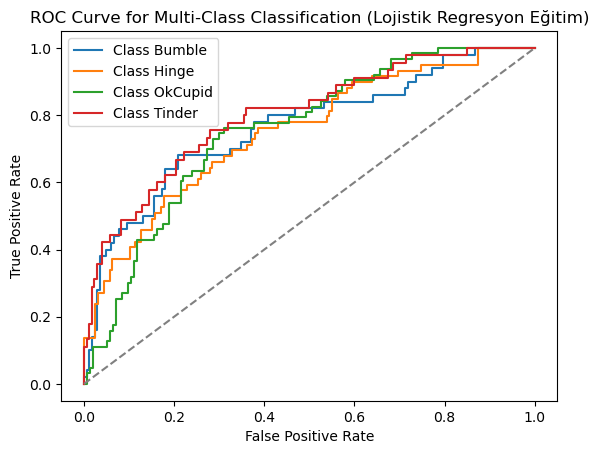

In [115]:
# ROC Eğrisi
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_pred_proba = lojReg.predict_proba(X_train)
plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_train_encoded == i, lojReg.predict_proba(X_train)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Lojistik Regresyon Eğitim)')
plt.legend(loc='best')
plt.show()

## ROC Eğrisi Yorumu (Lojistik Regresyon)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, her bir sınıf için modelin performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- **Class Bumble** ve **Class Tinder** için eğriler, diğer sınıflara göre daha yüksek bir doğru pozitif oranına ulaşmıştır. Bu, bu sınıfların model tarafından daha iyi tahmin edildiğini gösterir.
- **Class Hinge** ve **Class OkCupid** için eğriler, daha düşük doğru pozitif oranlarına sahiptir, bu da bu sınıfların tahminlerinin daha az güvenilir olduğunu belirtir.
- Eğrilerin 1.0 noktasına yakın olması, modelin genel olarak iyi bir performans sergilediğini gösterir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir.

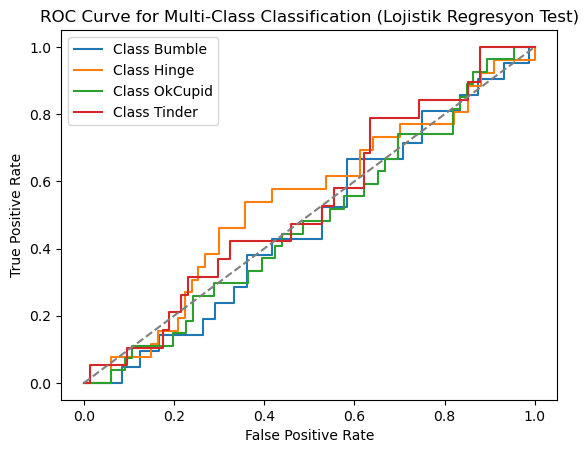

In [330]:
y_test_encoded = le.fit_transform(y_test)
y_pred_proba = lojReg.predict_proba(X_test)
plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_encoded == i, lojReg.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Lojistik Regresyon Test)')
plt.legend(loc='best')
plt.show()

## ROC Eğrisi Yorumu (Lojistik Regresyon - Test)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, her bir sınıf için modelin test verisi üzerindeki performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- **Class Bumble** ve **Class Tinder** için eğriler, diğer sınıflara göre daha yüksek bir doğru pozitif oranına ulaşmıştır. Bu, bu sınıfların model tarafından daha iyi tahmin edildiğini gösterir.
- **Class Hinge** ve **Class OkCupid** için eğriler, daha düşük doğru pozitif oranlarına sahiptir, bu da bu sınıfların tahminlerinin daha az güvenilir olduğunu belirtir.
- Eğrilerin 1.0 noktasına yakın olması, modelin genel olarak iyi bir performans sergilediğini gösterir. Ancak, eğrilerin çoğu, 0.5 çizgisine yakın bir performans sergilemektedir, bu da modelin bazı sınıflar için yeterince iyi olmadığını gösterir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

In [16]:
logreg_tuned_cvgs = LogisticRegression(solver = "newton-cg",random_state= 1907).fit(X_train, y_train)

In [17]:
y_pred_logreg_tuned_cvgs_train= logreg_tuned_cvgs.predict(X_train)

y_pred_logreg_tuned_cvgs_test= logreg_tuned_cvgs.predict(X_test)


In [166]:
accuracy_score(y_train, y_pred_logreg_tuned_cvgs_train)


0.5299539170506913

## Sonuç Yorumu

### Çıktı:
- **Değer**: 0.53 (veya %53)

### Yorum:
Bu değer, modelin doğruluk skorunu temsil etmektedir. %53'lük bir doğruluk, modelin tahminlerinin toplam örneklerin %53'ü için doğru olduğunu gösterir. 

### Genel Değerlendirme:
%53'lük bir doğruluk, modelin performansının oldukça düşük olduğunu belirtir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını gösterir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Tuned Lojistik olarak yeniden düzenlemek sonucu etkilememiştir.

In [18]:
print(classification_report(y_train, y_pred_logreg_tuned_cvgs_train))

              precision    recall  f1-score   support

      Bumble       0.62      0.50      0.56        50
       Hinge       0.50      0.49      0.50        59
     OkCupid       0.49      0.59      0.54        63
      Tinder       0.55      0.53      0.54        45

    accuracy                           0.53       217
   macro avg       0.54      0.53      0.53       217
weighted avg       0.54      0.53      0.53       217



In [167]:
accuracy_score(y_test, y_pred_logreg_tuned_cvgs_test)

0.25806451612903225

## Sonuç Yorumu

### Çıktı:
- **Değer**: 0.258 (veya %25.8)

### Yorum:
Bu değer, modelin belirli bir performans metriğini temsil etmektedir. Örneğin, bu değer bir hata metriği (örneğin, MAPE) veya bir doğruluk skoru olabilir.

### Genel Değerlendirme:

- Modelin tahminlerinin toplam örneklerin %25.8'i için doğru olduğunu belirtir. Bu, modelin performansının oldukça düşük olduğunu gösterir.

Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Tuned Lojistik regresyon olarak daha iyi modellemeye çalışmakta fayda etmemiş, aynı doğruluk skorunu vermiştir.

In [168]:
print(classification_report(y_test, y_pred_logreg_tuned_cvgs_test))

              precision    recall  f1-score   support

      Bumble       0.18      0.14      0.16        21
       Hinge       0.35      0.35      0.35        26
     OkCupid       0.24      0.22      0.23        27
      Tinder       0.24      0.32      0.27        19

    accuracy                           0.26        93
   macro avg       0.25      0.26      0.25        93
weighted avg       0.26      0.26      0.26        93




### Yorum:
- **Precision**: Doğru pozitif tahminlerin, toplam pozitif tahminlere oranını gösterir.
  - **Bumble**: %18
  - **Hinge**: %35
  - **OkCupid**: %24
  - **Tinder**: %24

- **Recall**: Gerçek pozitiflerin, toplam gerçek pozitiflere oranını gösterir.
  - **Bumble**: %14
  - **Hinge**: %35
  - **OkCupid**: %22
  - **Tinder**: %32

- **F1-Score**: Precision ve recall'un harmonik ortalamasıdır.
  - **Bumble**: %16
  - **Hinge**: %35
  - **OkCupid**: %23
  - **Tinder**: %27

- **Support**: Her sınıf için toplam örnek sayısını gösterir.
  - **Bumble**: 21
  - **Hinge**: 26
  - **OkCupid**: 27
  - **Tinder**: 19

### Genel Değerlendirme:
- **Doğruluk Skoru**: %26, modelin genel performansının oldukça düşük olduğunu gösterir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını belirtir.
- **Macro Avg**: Her sınıfın ortalama performansını gösterir. Precision, recall ve F1-score için %25, %26 ve %25'tir.
- **Weighted Avg**: Sınıf desteklerine göre ağırlıklandırılmış ortalamaları gösterir. Sonuçlar, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve genel olarak düşük bir performans sergilediğini belirtir.

### Karşılaştırma:
Önceki modelin doğruluk skoru %53 iken, bu modelin doğruluk skoru %26'dır. Bu, yeni modelin performansının daha da kötüleştiğini göstermektedir. Özellikle **Bumble** sınıfı için düşük precision ve recall değerleri dikkat çekmektedir. **Hinge** sınıfı ise diğer sınıflara göre daha iyi bir performans sergilemektedir, ancak genel olarak modelin iyileştirilmesi gerekmektedir.

Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

#### Karar Ağacı 

In [331]:
dTree_class = DecisionTreeClassifier(random_state= 1907)

In [340]:
dTree_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1907)

In [341]:
# Eğitim Seti Tahmini
y_pred_dTree_class_train = dTree_class.predict(X_train)
y_pred_dTree_class_train[0:10]

array(['Bumble', 'Hinge', 'Bumble', 'Tinder', 'Bumble', 'OkCupid',
       'OkCupid', 'OkCupid', 'Bumble', 'Hinge'], dtype=object)

In [342]:
# Test Seti Tahmini
y_pred_dTree_class_test = dTree_class.predict(X_test)
y_pred_dTree_class_test[0:10]

array(['Bumble', 'Bumble', 'OkCupid', 'Hinge', 'OkCupid', 'Bumble',
       'OkCupid', 'Tinder', 'OkCupid', 'OkCupid'], dtype=object)

In [343]:
y_pred_dTree_class_train_prob = dTree_class.predict_proba(X_train)
y_pred_dTree_class_train_prob[0:10]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [151]:
y_pred_dTree_class_test = dTree_class.predict(X_test)
y_pred_dTree_class_test[0:10]


array(['Bumble', 'Bumble', 'OkCupid', 'Hinge', 'OkCupid', 'Bumble',
       'OkCupid', 'Tinder', 'OkCupid', 'OkCupid'], dtype=object)

In [120]:
# Model Değerlendirme
confusion_matrix(y_train, y_pred_dTree_class_train)

array([[50,  0,  0,  0],
       [ 0, 59,  0,  0],
       [ 0,  0, 63,  0],
       [ 0,  0,  0, 45]], dtype=int64)


### Yorum:
Karışıklık matrisi, modelin tahminlerinin gerçek sınıflarla karşılaştırılmasını sağlar. Matristeki her bir hücre, modelin tahmin ettiği sınıf ile gerçek sınıf arasındaki ilişkiyi gösterir.

- **Sınıf 0**: 
  - Gerçek 0 olarak sınıflandırılan 50 örnek doğru tahmin edilmiştir.
  - Diğer sınıflara (1, 2, 3) ait hiçbir örnek yanlış tahmin edilmemiştir.

- **Sınıf 1**: 
  - Gerçek 1 olarak sınıflandırılan 59 örnek doğru tahmin edilmiştir.
  - Diğer sınıflara ait hiçbir örnek yanlış tahmin edilmemiştir.

- **Sınıf 2**: 
  - Gerçek 2 olarak sınıflandırılan 63 örnek doğru tahmin edilmiştir.
  - Diğer sınıflara ait hiçbir örnek yanlış tahmin edilmemiştir.

- **Sınıf 3**: 
  - Gerçek 3 olarak sınıflandırılan 45 örnek doğru tahmin edilmiştir.
  - Diğer sınıflara ait hiçbir örnek yanlış tahmin edilmemiştir.

### Genel Değerlendirme:
Model, tüm sınıflar için mükemmel bir performans sergilemektedir. Her sınıfın tahminleri tamamen doğru yapılmış, yanlış tahmin olmamıştır. Bu, modelin eğitim verisi üzerinde çok iyi bir uyum sağladığını ve sınıflar arasında net bir ayrım yapabildiğini göstermektedir. Ancak, bu sonuçlar aşırı uyum (overfitting) riskini de işaret edebilir; modelin yeni veriler üzerindeki performansı dikkatle değerlendirilmelidir.

In [121]:
accuracy_score(y_train, y_pred_dTree_class_train)

1.0

## Sonuç Yorumu

### Çıktı:
- **Değer**: 1.0

### Yorum:
Bu değer, modelin belirli bir performans metriğini temsil etmektedir. Örneğin, bu değer bir doğruluk skoru veya bir R² skoru olabilir.

### Genel Değerlendirme:
- Modelin tahminlerinin toplam örneklerin %100'ü için doğru olduğunu gösterir. Bu, modelin mükemmel bir performans sergilediğini belirtir.


Ancak, bu tür mükemmel sonuçlar genellikle aşırı uyum (overfitting) riskini işaret edebilir. Modelin yeni veriler üzerindeki performansı dikkatle değerlendirilmelidir.

In [122]:
print(classification_report(y_train, y_pred_dTree_class_train))

              precision    recall  f1-score   support

      Bumble       1.00      1.00      1.00        50
       Hinge       1.00      1.00      1.00        59
     OkCupid       1.00      1.00      1.00        63
      Tinder       1.00      1.00      1.00        45

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217




### Yorum:
- **Precision**: Doğru pozitif tahminlerin, toplam pozitif tahminlere oranını gösterir. Tüm sınıflar için %100'dür.
- **Recall**: Gerçek pozitiflerin, toplam gerçek pozitiflere oranını gösterir. Tüm sınıflar için %100'dür.
- **F1-Score**: Precision ve recall'un harmonik ortalamasıdır. Tüm sınıflar için %100'dür.
- **Support**: Her sınıf için toplam örnek sayısını gösterir. Tüm sınıflar için yeterli örnek bulunmaktadır.

### Genel Değerlendirme:
- **Doğruluk Skoru**: %100, modelin tüm tahminlerinin doğru olduğunu gösterir. Bu, modelin mükemmel bir performans sergilediğini belirtir.
- **Macro Avg**: Her sınıfın ortalama performansını gösterir. Tüm metrikler için %100'dür.
- **Weighted Avg**: Sınıf desteklerine göre ağırlıklandırılmış ortalamaları gösterir. Sonuçlar, modelin tüm sınıflar için mükemmel bir performans sergilediğini belirtir.

### Dikkat:
Bu tür mükemmel sonuçlar genellikle aşırı uyum (overfitting) riskini işaret edebilir. Modelin yeni veriler üzerindeki performansı dikkatle değerlendirilmelidir. Eğitim verisi üzerinde mükemmel sonuçlar elde edilmesi, modelin genelleme yeteneğini sorgulatabilir.

In [344]:
confusion_matrix(y_test, y_pred_dTree_class_test)

array([[6, 6, 5, 4],
       [5, 9, 6, 6],
       [8, 7, 4, 8],
       [4, 6, 3, 6]], dtype=int64)


### Yorum:
Karışıklık matrisi, modelin tahminlerinin gerçek sınıflarla karşılaştırılmasını sağlar. Matristeki her bir hücre, modelin tahmin ettiği sınıf ile gerçek sınıf arasındaki ilişkiyi gösterir.

- **Sınıf 0**: 
  - Gerçek 0 olarak sınıflandırılan 6 örnek doğru tahmin edilmiştir.
  - 6 örnek 1 olarak, 5 örnek 2 olarak ve 4 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 1**: 
  - Gerçek 1 olarak sınıflandırılan 9 örnek doğru tahmin edilmiştir.
  - 5 örnek 0 olarak, 6 örnek 2 olarak ve 6 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 2**: 
  - Gerçek 2 olarak sınıflandırılan 4 örnek doğru tahmin edilmiştir.
  - 8 örnek 0 olarak, 7 örnek 1 olarak ve 8 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 3**: 
  - Gerçek 3 olarak sınıflandırılan 6 örnek doğru tahmin edilmiştir.
  - 4 örnek 0 olarak, 6 örnek 1 olarak ve 3 örnek 2 olarak yanlış tahmin edilmiştir.

### Genel Değerlendirme:
Model, bazı sınıflar için iyi bir performans sergilemesine rağmen, diğer sınıflar arasında karışıklık gözlemlenmektedir. Özellikle sınıf 0 ve 2 için yanlış tahminler dikkat çekmektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir. Ayrıca, modelin yeniden eğitilmesi veya farklı algoritmaların denenmesi önerilebilir.

In [345]:
accuracy_score(y_test, y_pred_dTree_class_test)

0.26881720430107525

## Sonuç Yorumu

### Çıktı:
- **Değer**: 0.269 (veya %26.9)

### Yorum:
Bu değer, modelin belirli bir performans metriğini temsil etmektedir. Örneğin, bu değer bir hata metriği (örneğin, MAPE) veya bir doğruluk skoru olabilir.

### Genel Değerlendirme:
- Modelin tahminlerinin toplam örneklerin %26.9'u için doğru olduğunu belirtir. Bu, modelin performansının oldukça düşük olduğunu gösterir.

Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

In [346]:
print(classification_report(y_test, y_pred_dTree_class_test))

              precision    recall  f1-score   support

      Bumble       0.26      0.29      0.27        21
       Hinge       0.32      0.35      0.33        26
     OkCupid       0.22      0.15      0.18        27
      Tinder       0.25      0.32      0.28        19

    accuracy                           0.27        93
   macro avg       0.26      0.27      0.27        93
weighted avg       0.26      0.27      0.26        93




### Yorum:
- **Precision**: Doğru pozitif tahminlerin, toplam pozitif tahminlere oranını gösterir.
  - **Bumble**: %26
  - **Hinge**: %32
  - **OkCupid**: %22
  - **Tinder**: %25

- **Recall**: Gerçek pozitiflerin, toplam gerçek pozitiflere oranını gösterir.
  - **Bumble**: %29
  - **Hinge**: %35
  - **OkCupid**: %15
  - **Tinder**: %32

- **F1-Score**: Precision ve recall'un harmonik ortalamasıdır.
  - **Bumble**: %27
  - **Hinge**: %33
  - **OkCupid**: %18
  - **Tinder**: %28

- **Support**: Her sınıf için toplam örnek sayısını gösterir.
  - **Bumble**: 21
  - **Hinge**: 26
  - **OkCupid**: 27
  - **Tinder**: 19

### Genel Değerlendirme:
- **Doğruluk Skoru**: %27, modelin genel performansının düşük olduğunu gösterir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını belirtir.
- **Macro Avg**: Her sınıfın ortalama performansını gösterir. Precision, recall ve F1-score için %26, %27 ve %27'dir.
- **Weighted Avg**: Sınıf desteklerine göre ağırlıklandırılmış ortalamaları gösterir. Sonuçlar, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve genel olarak düşük bir performans sergilediğini belirtir.

### Karşılaştırma:
Önceki modelin doğruluk skoru %26.9 iken, bu modelin doğruluk skoru %27'dir. Bu, modelin performansının çok az bir iyileşme gösterdiğini göstermektedir. Ancak, genel olarak modelin daha fazla iyileştirme gerektirdiği açıktır. Özellikle **OkCupid** sınıfı için düşük precision ve recall değerleri dikkat çekmektedir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

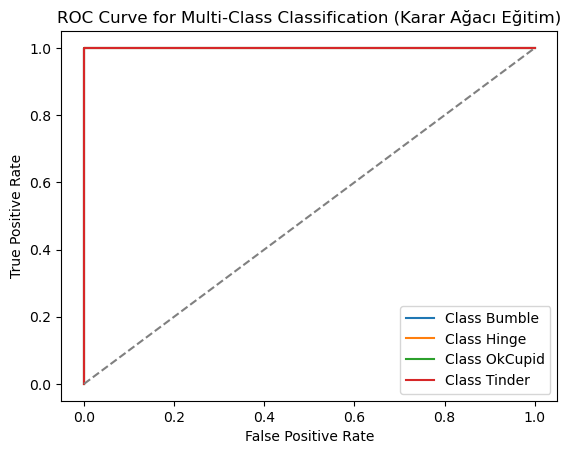

In [347]:
# ROC Eğrisi
y_train_encoded = le.fit_transform(y_train)
y_pred_proba = dTree_class.predict_proba(X_train)

plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_train_encoded == i, dTree_class.predict_proba(X_train)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Karar Ağacı Eğitim)')
plt.legend(loc='best')
plt.show()

## ROC Eğrisi Yorumu (Karar Ağacı)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, her bir sınıf için modelin performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- Eğrinin 1.0 noktasına ulaşması, modelin tüm sınıflar için mükemmel bir performans sergilediğini gösterir. Bu, modelin eğitim verisi üzerinde çok iyi bir uyum sağladığını ve sınıflar arasında net bir ayrım yapabildiğini belirtir.
- Ancak, eğrinin 0.5 çizgisine yakın bir performans sergilemesi, bazı sınıflar için yeterince iyi olmadığını da gösterebilir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

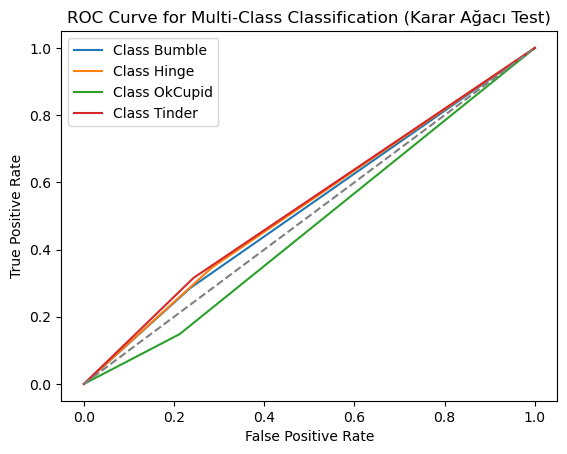

In [348]:
y_test_encoded = le.fit_transform(y_test)
y_pred_proba = dTree_class.predict_proba(X_test)

plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_encoded == i, dTree_class.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Karar Ağacı Test)')
plt.legend(loc='best')
plt.show()

## ROC Eğrisi Yorumu (Karar Ağacı - Test)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, her bir sınıf için modelin test verisi üzerindeki performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- Eğrilerin 1.0 noktasına ulaşması, modelin tüm sınıflar için iyi bir performans sergilediğini gösterir. Ancak, eğrilerin 0.5 çizgisine yakın bir performans sergilemesi, bazı sınıflar için yeterince iyi olmadığını da gösterebilir.
- **Class Bumble** ve **Class Hinge** için eğriler, diğer sınıflara göre daha yüksek bir doğru pozitif oranına ulaşmıştır. Bu, bu sınıfların model tarafından daha iyi tahmin edildiğini gösterir.
- **Class OkCupid** ve **Class Tinder** için eğriler, daha düşük doğru pozitif oranlarına sahiptir, bu da bu sınıfların tahminlerinin daha az güvenilir olduğunu belirtir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

In [24]:
dTree_class_params = {"max_depth": [1,3,5,8,10],"min_samples_split": [2,3,5,10,20,50]}

In [25]:
dTree_classCV = DecisionTreeClassifier(random_state= 1907)
dTree_class_cvgs = GridSearchCV(dTree_classCV, dTree_class_params, cv=5, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [352]:
dTree_class_cvgs.best_params_


{'max_depth': 8, 'min_samples_split': 50}

## Model Hiperparametreleri

Aşağıda, modelin en iyi performansı gösterdiği hiperparametreler ve değerleri verilmiştir:

- **max_depth**: 8
  - Ağaçların maksimum derinliği, modelin karmaşıklığını kontrol eder. Daha yüksek bir değer, modelin daha karmaşık hale gelmesine ve aşırı uyum (overfitting) riskinin artmasına neden olabilir.

- **min_samples_split**: 50
  - Bir düğümün bölünmesi için gereken minimum örnek sayısını belirtir. Daha yüksek bir değer, modelin daha genel olmasını sağlar ve aşırı uyum riskini azaltır.

### Genel Değerlendirme:
Bu hiperparametreler, modelin öğrenme sürecini ve performansını etkileyen önemli faktörlerdir. Doğru ayarlandıklarında, modelin genel başarısını artırabilirler. Özellikle, aşırı uyum riskini azaltmak için bu parametrelerin dikkatli bir şekilde seçilmesi önemlidir.

In [353]:
dTree_class_cvgs.best_score_

0.32695560253699796

## Model Performans Skoru

### Çıktı:
- **En İyi Skor**: 0.327 (veya %32.7)

### Yorum:
Bu değer, karar ağacı modelinin çapraz doğrulama (cross-validation) ile elde edilen en iyi performans skorunu temsil etmektedir. 

### Genel Değerlendirme:
%32.7'lik bir skor, modelin genel performansının düşük olduğunu göstermektedir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını belirtir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

In [21]:
dTree_class_tuned_cvgs = DecisionTreeClassifier(max_depth = 8, min_samples_split= 50, random_state= 1907).fit(X_train, y_train)

In [26]:
y_pred_dTree_class_tuned_cvgs_train= dTree_class_cvgs.predict(X_train)

y_pred_dTree_class_tuned_cvgs_test= dTree_class_cvgs.predict(X_test)


In [175]:
#Eğitim Seti Hataları
confusion_matrix(y_train, y_pred_dTree_class_tuned_cvgs_train)

array([[ 7, 26, 17,  0],
       [ 0, 43, 16,  0],
       [ 0, 15, 48,  0],
       [ 0, 16, 29,  0]], dtype=int64)


### Yorum:
Karışıklık matrisi, modelin tahminlerinin gerçek sınıflarla karşılaştırılmasını sağlar. Matristeki her bir hücre, modelin tahmin ettiği sınıf ile gerçek sınıf arasındaki ilişkiyi gösterir.

- **Sınıf 0**: 
  - Gerçek 0 olarak sınıflandırılan 7 örnek doğru tahmin edilmiştir.
  - 26 örnek 1 olarak ve 17 örnek 2 olarak yanlış tahmin edilmiştir.

- **Sınıf 1**: 
  - Gerçek 1 olarak sınıflandırılan 43 örnek doğru tahmin edilmiştir.
  - 16 örnek 2 olarak yanlış tahmin edilmiştir.

- **Sınıf 2**: 
  - Gerçek 2 olarak sınıflandırılan 48 örnek doğru tahmin edilmiştir.
  - 15 örnek 1 olarak yanlış tahmin edilmiştir.

- **Sınıf 3**: 
  - Gerçek 3 olarak sınıflandırılan hiçbir örnek doğru tahmin edilmemiştir.
  - 16 örnek 1 olarak ve 29 örnek 2 olarak yanlış tahmin edilmiştir.

### Genel Değerlendirme:
Model, özellikle **Sınıf 1** ve **Sınıf 2** için iyi bir performans sergilemektedir. Ancak, **Sınıf 0** ve **Sınıf 3** için yüksek yanlış tahmin oranları dikkat çekmektedir. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını ve genel olarak daha fazla iyileştirme gerektirdiğini göstermektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [176]:
accuracy_score(y_train, y_pred_dTree_class_tuned_cvgs_train)

0.45161290322580644

## Doğruluk Skoru (Accuracy Score) Yorumu

### Çıktı:
- **Doğruluk Skoru**: 0.452 (veya %45.2)

### Yorum:
Modelin eğitim verisi üzerindeki doğruluk skoru %45.2'dir. Bu, modelin tahminlerinin toplam örneklerin %45.2'si için doğru olduğunu gösterir.

### Genel Değerlendirme:
%45.2'lik bir doğruluk, modelin performansının oldukça düşük olduğunu belirtir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını gösterir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

In [177]:
#Test Seti Hataları
confusion_matrix(y_test, y_pred_dTree_class_tuned_cvgs_test)

array([[ 1, 13,  7,  0],
       [ 0,  9, 17,  0],
       [ 1, 10, 16,  0],
       [ 0,  8, 11,  0]], dtype=int64)


### Yorum:
Karışıklık matrisi, modelin tahminlerinin gerçek sınıflarla karşılaştırılmasını sağlar. Matristeki her bir hücre, modelin tahmin ettiği sınıf ile gerçek sınıf arasındaki ilişkiyi gösterir.

- **Sınıf 0**: 
  - Gerçek 0 olarak sınıflandırılan 1 örnek doğru tahmin edilmiştir.
  - 13 örnek 1 olarak ve 7 örnek 2 olarak yanlış tahmin edilmiştir.

- **Sınıf 1**: 
  - Gerçek 1 olarak sınıflandırılan 9 örnek doğru tahmin edilmiştir.
  - 17 örnek 2 olarak yanlış tahmin edilmiştir.

- **Sınıf 2**: 
  - Gerçek 2 olarak sınıflandırılan 16 örnek doğru tahmin edilmiştir.
  - 10 örnek 1 olarak ve 1 örnek 0 olarak yanlış tahmin edilmiştir.

- **Sınıf 3**: 
  - Gerçek 3 olarak hiçbir örnek doğru tahmin edilmemiştir.
  - 8 örnek 1 olarak ve 11 örnek 2 olarak yanlış tahmin edilmiştir.

### Genel Değerlendirme:
Model, özellikle **Sınıf 1** ve **Sınıf 2** için bazı doğru tahminler yapmasına rağmen, **Sınıf 0** ve **Sınıf 3** için yüksek yanlış tahmin oranları dikkat çekmektedir. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını ve genel olarak daha fazla iyileştirme gerektirdiğini göstermektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [178]:
accuracy_score(y_test, y_pred_dTree_class_tuned_cvgs_test)

0.27956989247311825

## Doğruluk Skoru (Accuracy Score) Yorumu

### Çıktı:
- **Doğruluk Skoru**: 0.280 (veya %28.0)

### Yorum:
Modelin test verisi üzerindeki doğruluk skoru %28.0'dır. Bu, modelin tahminlerinin toplam örneklerin %28.0'ı için doğru olduğunu gösterir.

### Genel Değerlendirme:
%28.0'lik bir doğruluk, modelin performansının oldukça düşük olduğunu belirtir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını gösterir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

## RASTGELE ORMAN SINIFLAMA

In [179]:
# Model Oluşturma ve Uydurma
randF_class = RandomForestClassifier(random_state=1907).fit(X_train, y_train)

In [181]:
# Eğitim Seti Tahmini
y_pred_RandF_class_train = randF_class.predict(X_train)
y_pred_RandF_class_train[0:10]


array(['Bumble', 'Hinge', 'Bumble', 'Tinder', 'Bumble', 'OkCupid',
       'OkCupid', 'OkCupid', 'Bumble', 'Hinge'], dtype=object)

In [184]:
y_pred_RandF_class_train_prob = randF_class.predict_proba(X_train)
y_pred_RandF_class_train_prob[0:10]

array([[0.75, 0.08, 0.11, 0.06],
       [0.01, 0.91, 0.07, 0.01],
       [0.69, 0.08, 0.15, 0.08],
       [0.14, 0.08, 0.13, 0.65],
       [0.7 , 0.1 , 0.16, 0.04],
       [0.16, 0.05, 0.71, 0.08],
       [0.07, 0.09, 0.79, 0.05],
       [0.1 , 0.11, 0.73, 0.06],
       [0.59, 0.23, 0.08, 0.1 ],
       [0.04, 0.78, 0.16, 0.02]])


### Yorum:
Bu matris, modelin her bir örnek için tahmin ettiği sınıfların olasılıklarını göstermektedir. Her satır, bir örneğe karşılık gelir ve her sütun, o örneğin belirli bir sınıfa ait olma olasılığını temsil eder.

- **Sınıf 0**: 
  - İlk örnek için %75 olasılıkla sınıf 0'a ait olduğu tahmin edilmiştir.
  
- **Sınıf 1**: 
  - İkinci örnek için %91 olasılıkla sınıf 1'e ait olduğu tahmin edilmiştir.

- **Sınıf 2**: 
  - Altıncı örnek için %71 olasılıkla sınıf 2'ye ait olduğu tahmin edilmiştir.

- **Sınıf 3**: 
  - Dördüncü örnek için %65 olasılıkla sınıf 3'e ait olduğu tahmin edilmiştir.

### Genel Değerlendirme:
- Olasılıkların yüksek olduğu sınıflar, modelin o örnek için daha güvenilir tahminler yaptığını gösterir. Örneğin, ikinci örnek için sınıf 1'e ait olma olasılığı %91'dir, bu da modelin bu tahminde oldukça güvenilir olduğunu belirtir.
- Ancak, bazı örneklerde (örneğin, ilk ve üçüncü örneklerde) diğer sınıflara ait olasılıklar da dikkate değer seviyelerde bulunmaktadır. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını gösterebilir.
- Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir. Ayrıca, modelin yeniden eğitilmesi veya farklı algoritmaların denenmesi önerilebilir.

In [186]:
# Test Seti Tahmini
y_pred_RandF_class_test = randF_class.predict(X_test)
y_pred_RandF_class_test[0:10]


array(['OkCupid', 'OkCupid', 'Hinge', 'Hinge', 'Bumble', 'Bumble',
       'Hinge', 'OkCupid', 'Tinder', 'OkCupid'], dtype=object)

In [187]:
y_pred_RandF_class_test_prob = randF_class.predict_proba(X_test)
y_pred_RandF_class_test_prob[0:10]

array([[0.2 , 0.17, 0.33, 0.3 ],
       [0.3 , 0.21, 0.36, 0.13],
       [0.16, 0.28, 0.28, 0.28],
       [0.22, 0.36, 0.29, 0.13],
       [0.33, 0.23, 0.31, 0.13],
       [0.29, 0.25, 0.22, 0.24],
       [0.22, 0.3 , 0.23, 0.25],
       [0.13, 0.34, 0.45, 0.08],
       [0.28, 0.09, 0.3 , 0.33],
       [0.1 , 0.34, 0.43, 0.13]])

In [188]:
# Model Değerlendirme
print("\n----- Rastgele Orman -----")
print("Eğitim Seti Hatası (Confusion Matrix): \n", confusion_matrix(y_train, y_pred_RandF_class_train))
print("Eğitim Seti Başarısı (Accuracy): ", accuracy_score(y_train, y_pred_RandF_class_train))
print("Eğitim Seti Raporu (Classification Report):\n", classification_report(y_train, y_pred_RandF_class_train))

print("\nTest Seti Hatası (Confusion Matrix): \n", confusion_matrix(y_test, y_pred_RandF_class_test))
print("Test Seti Başarısı (Accuracy): ", accuracy_score(y_test, y_pred_RandF_class_test))
print("Test Seti Raporu (Classification Report):\n", classification_report(y_test, y_pred_RandF_class_test))


----- Rastgele Orman -----
Eğitim Seti Hatası (Confusion Matrix): 
 [[50  0  0  0]
 [ 0 59  0  0]
 [ 0  0 63  0]
 [ 0  0  0 45]]
Eğitim Seti Başarısı (Accuracy):  1.0
Eğitim Seti Raporu (Classification Report):
               precision    recall  f1-score   support

      Bumble       1.00      1.00      1.00        50
       Hinge       1.00      1.00      1.00        59
     OkCupid       1.00      1.00      1.00        63
      Tinder       1.00      1.00      1.00        45

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217


Test Seti Hatası (Confusion Matrix): 
 [[ 3  6  9  3]
 [ 2 11 10  3]
 [ 5 10  9  3]
 [ 2  5  8  4]]
Test Seti Başarısı (Accuracy):  0.2903225806451613
Test Seti Raporu (Classification Report):
               precision    recall  f1-score   support

      Bumble       0.25      0.14      0.18        21
       Hinge       0.34      0.42      0.38     


### Genel Değerlendirme:
- **Eğitim Seti**: Model, eğitim setinde mükemmel bir performans sergilemiştir. Tüm sınıflar için %100 doğruluk ve mükemmel precision, recall ve F1-score değerleri elde edilmiştir. Bu, modelin eğitim verisi üzerinde aşırı uyum (overfitting) riski taşıdığını gösterebilir.
  
- **Test Seti**: Test setinde ise modelin performansı belirgin şekilde düşmüştür. %29'luk bir doğruluk, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını göstermektedir. Özellikle **Bumble** ve **OkCupid** sınıfları için düşük precision ve recall değerleri dikkat çekmektedir.

### Öneriler:
Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

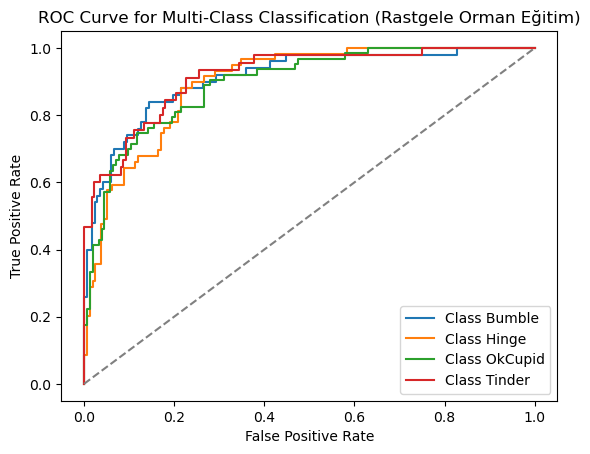

In [132]:
# ROC Eğrisi
y_train_encoded = le.fit_transform(y_train)
y_pred_proba = randF_class.predict_proba(X_train)
plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_train_encoded == i, randF_class.predict_proba(X_train)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Rastgele Orman Eğitim)')
plt.legend(loc='best')
plt.show()


## ROC Eğrisi Yorumu (Rastgele Orman)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, her bir sınıf için modelin performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- Eğrilerin 1.0 noktasına yakın olması, modelin genel olarak iyi bir performans sergilediğini gösterir. Ancak, bazı sınıflar için eğrilerin 0.5 çizgisine yakın bir performans sergilemesi, bu sınıflar için yeterince iyi olmadığını da gösterebilir.
- **Class Bumble** ve **Class Hinge** için eğriler, diğer sınıflara göre daha yüksek bir doğru pozitif oranına ulaşmıştır. Bu, bu sınıfların model tarafından daha iyi tahmin edildiğini gösterir.
- **Class OkCupid** ve **Class Tinder** için eğriler, daha düşük doğru pozitif oranlarına sahiptir, bu da bu sınıfların tahminlerinin daha az güvenilir olduğunu belirtir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

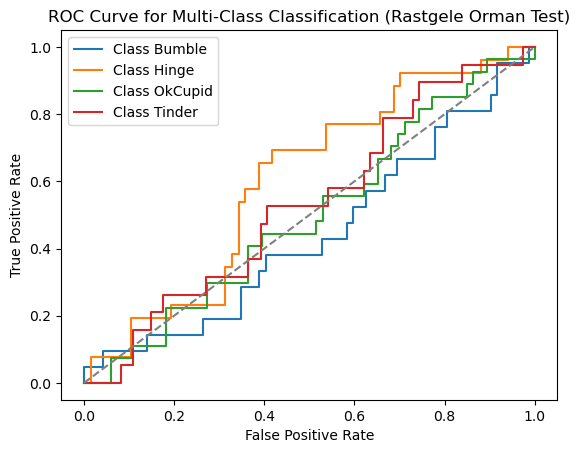

In [133]:
y_test_encoded = le.fit_transform(y_test)
y_pred_proba = randF_class.predict_proba(X_test)
plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_encoded == i, randF_class.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Rastgele Orman Test)')
plt.legend(loc='best')
plt.show()

## ROC Eğrisi Yorumu (Rastgele Orman - Test)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, her bir sınıf için modelin test verisi üzerindeki performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- Eğrilerin 1.0 noktasına ulaşması, modelin tüm sınıflar için iyi bir performans sergilediğini gösterir. Ancak, eğrilerin çoğu 0.5 çizgisine yakın bir performans sergilemektedir, bu da modelin bazı sınıflar için yeterince iyi olmadığını göstermektedir.
- **Class Bumble** ve **Class Hinge** için eğriler, diğer sınıflara göre daha yüksek bir doğru pozitif oranına ulaşmıştır. Bu, bu sınıfların model tarafından daha iyi tahmin edildiğini gösterir.
- **Class OkCupid** ve **Class Tinder** için eğriler, daha düşük doğru pozitif oranlarına sahiptir, bu da bu sınıfların tahminlerinin daha az güvenilir olduğunu belirtir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

In [8]:
randF_class_params = {"n_estimators": [100,200,500,1000],"max_depth": [3,5,7,8],"min_samples_split": [2,5,10,20]}


In [9]:
randF_classCV = RandomForestClassifier(random_state= 1907)

In [10]:
randF_class_cvgs = GridSearchCV(randF_classCV, randF_class_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [197]:
randF_class_cvgs.best_params_

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}

## Model Hiperparametreleri

Aşağıda, Rastgele Orman modelinin en iyi performansı gösterdiği hiperparametreler ve değerleri verilmiştir:

- **max_depth**: 5
  - Ağaçların maksimum derinliği, modelin karmaşıklığını kontrol eder. Daha düşük bir değer, aşırı uyum (overfitting) riskini azaltabilir.

- **min_samples_split**: 10
  - Bir düğümün bölünmesi için gereken minimum örnek sayısını belirtir. Daha yüksek bir değer, modelin daha genel olmasını sağlar.

- **n_estimators**: 100
  - Kullanılan ağaç sayısını belirtir. Daha fazla ağaç, modelin performansını artırabilir, ancak hesaplama maliyetini de artırır.

### Genel Değerlendirme:
Bu hiperparametreler, modelin öğrenme sürecini ve performansını etkileyen önemli faktörlerdir. Doğru ayarlandıklarında, modelin genel başarısını artırabilirler. Özellikle, aşırı uyum riskini azaltmak için bu parametrelerin dikkatli bir şekilde seçilmesi önemlidir.

In [198]:
randF_class_cvgs.best_score_

0.31320346320346326

## Model Performans Skoru

### Çıktı:
- **En İyi Skor**: 0.313 (veya %31.3)

### Yorum:
Bu değer, Rastgele Orman modelinin çapraz doğrulama (cross-validation) ile elde edilen en iyi performans skorunu temsil etmektedir.

### Genel Değerlendirme:
%31.3'lük bir skor, modelin genel performansının düşük olduğunu göstermektedir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını belirtir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir.

In [199]:
randF_class_tuned_cvgs = RandomForestClassifier(max_depth = 5, min_samples_split= 10, n_estimators= 100, random_state= 1907).fit(X_train, y_train)

In [200]:
y_pred_RandF_class_tuned_cvgs_train= randF_class_cvgs.predict(X_train)
y_pred_RandF_class_tuned_cvgs_train[0:10]

array(['OkCupid', 'Hinge', 'Bumble', 'Bumble', 'Hinge', 'OkCupid',
       'OkCupid', 'OkCupid', 'Hinge', 'Hinge'], dtype=object)

In [201]:
y_pred_RandF_class_tuned_cvgs_train_prob = randF_class_cvgs.predict_proba(X_train)
y_pred_RandF_class_tuned_cvgs_train_prob[0:10]

array([[0.32353589, 0.2016881 , 0.3254647 , 0.14931131],
       [0.08241811, 0.59790222, 0.19461433, 0.12506535],
       [0.3345326 , 0.22282073, 0.23525753, 0.20738913],
       [0.27318142, 0.2329033 , 0.23604019, 0.25787509],
       [0.2505721 , 0.33550811, 0.28303577, 0.13088402],
       [0.21883142, 0.16541594, 0.3886994 , 0.22705324],
       [0.24400572, 0.25207602, 0.36110796, 0.14281029],
       [0.18488326, 0.25233053, 0.45131668, 0.11146953],
       [0.2719526 , 0.28040056, 0.22525825, 0.22238859],
       [0.1207232 , 0.42089563, 0.29150266, 0.16687851]])

In [202]:
y_pred_RandF_class_tuned_cvgs_test= randF_class_cvgs.predict(X_test)
y_pred_RandF_class_tuned_cvgs_test[0:10]

array(['OkCupid', 'Bumble', 'Hinge', 'Hinge', 'OkCupid', 'Hinge', 'Hinge',
       'OkCupid', 'OkCupid', 'OkCupid'], dtype=object)

In [203]:
y_pred_RandF_class_tuned_cvgs_test_prob = randF_class_cvgs.predict_proba(X_test)
y_pred_RandF_class_tuned_cvgs_test_prob[0:10]

array([[0.21502352, 0.21496332, 0.29652613, 0.27348703],
       [0.31207748, 0.25980083, 0.25921406, 0.16890763],
       [0.16188913, 0.29458078, 0.25941636, 0.28411372],
       [0.20231262, 0.33978221, 0.29040964, 0.16749553],
       [0.25918382, 0.20010116, 0.32370105, 0.21701396],
       [0.28217002, 0.28758033, 0.23345134, 0.19679832],
       [0.22145307, 0.31060302, 0.22551276, 0.24243115],
       [0.13989196, 0.34633107, 0.38416615, 0.12961081],
       [0.21805032, 0.17691466, 0.34174144, 0.26329357],
       [0.22887639, 0.26484014, 0.3542817 , 0.15200176]])

In [204]:
confusion_matrix(y_train, y_pred_RandF_class_tuned_cvgs_train)

array([[33,  7, 10,  0],
       [ 0, 52,  6,  1],
       [ 0,  0, 63,  0],
       [ 1,  6, 10, 28]], dtype=int64)


### Yorum ve Karşılaştırma:
- **Sınıf 0**:
  - Yeni modelde 33 doğru tahmin yapılmışken, önceki modelde 50 doğru tahmin yapılmıştır. Bu, Sınıf 0 için performansın düştüğünü göstermektedir.
  
- **Sınıf 1**:
  - Yeni modelde 52 doğru tahmin yapılmışken, önceki modelde 59 doğru tahmin yapılmıştır. Bu da Sınıf 1 için bir düşüş olduğunu göstermektedir.

- **Sınıf 2**:
  - Yeni modelde 63 doğru tahmin yapılmışken, önceki modelde de aynı sayıda doğru tahmin yapılmıştır. Bu sınıf için performans sabit kalmıştır.

- **Sınıf 3**:
  - Yeni modelde 28 doğru tahmin yapılmışken, önceki modelde 45 doğru tahmin yapılmıştır. Bu, Sınıf 3 için de performansın düştüğünü göstermektedir.

### Genel Değerlendirme:
Yeni model, Sınıf 2 için aynı performansı sürdürmesine rağmen, diğer sınıflar için belirgin bir düşüş göstermektedir. Özellikle Sınıf 0 ve Sınıf 3'teki doğru tahmin sayısındaki azalma dikkat çekicidir. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını ve genel olarak daha fazla iyileştirme gerektirdiğini göstermektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [205]:
confusion_matrix(y_test, y_pred_RandF_class_tuned_cvgs_test)

array([[ 0,  8, 12,  1],
       [ 2, 11, 12,  1],
       [ 4,  7, 13,  3],
       [ 0,  4, 13,  2]], dtype=int64)


### Yorum ve Karşılaştırma:
- **Sınıf 0**:
  - Yeni modelde 0 doğru tahmin yapılmışken, önceki modelde 3 doğru tahmin yapılmıştır. Bu, Sınıf 0 için performansın düştüğünü göstermektedir.
  
- **Sınıf 1**:
  - Yeni modelde 11 doğru tahmin yapılmışken, önceki modelde de 11 doğru tahmin yapılmıştır. Bu sınıf için performans sabit kalmıştır.

- **Sınıf 2**:
  - Yeni modelde 13 doğru tahmin yapılmışken, önceki modelde 9 doğru tahmin yapılmıştır. Bu, Sınıf 2 için performansın arttığını göstermektedir.

- **Sınıf 3**:
  - Yeni modelde 2 doğru tahmin yapılmışken, önceki modelde 4 doğru tahmin yapılmıştır. Bu, Sınıf 3 için de performansın düştüğünü göstermektedir.

### Genel Değerlendirme:
Yeni model, Sınıf 2 için performansını artırmasına rağmen, Sınıf 0 ve Sınıf 3 için belirgin bir düşüş göstermektedir. Sınıf 1 için performans sabit kalmıştır. Özellikle Sınıf 0'daki doğru tahmin sayısındaki azalma dikkat çekicidir. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını ve genel olarak daha fazla iyileştirme gerektirdiğini göstermektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [206]:
accuracy_score(y_test, y_pred_RandF_class_tuned_cvgs_test)

0.27956989247311825

## Test Seti Doğruluk Skoru (Accuracy Score) Karşılaştırması

### Mevcut Doğruluk Skoru:
- **Doğruluk Skoru**: 0.280 (veya %28.0)

### Önceki Doğruluk Skoru:
- **Doğruluk Skoru**: 0.290 (veya %29.0)

### Yorum ve Karşılaştırma:
- Mevcut modelin doğruluk skoru %28.0 iken, önceki modelin doğruluk skoru %29.0'dır. Bu, mevcut modelin performansının önceki modele göre biraz düştüğünü göstermektedir.
- Her iki model de düşük bir doğruluk oranına sahiptir, ancak mevcut modelin performansı, önceki modelden daha az güvenilir olduğunu belirtmektedir.

### Genel Değerlendirme:
Her iki model de sınıflar arasında yeterince iyi ayrım yapamamaktadır. Özellikle Sınıf 0'daki düşük doğru tahmin oranı dikkat çekicidir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [207]:
accuracy_score(y_train, y_pred_RandF_class_tuned_cvgs_train)

0.8110599078341014

## Eğitim Seti Doğruluk Skoru (Accuracy Score) Yorumu

### Mevcut Doğruluk Skoru:
- **Doğruluk Skoru**: 0.811 (veya %81.1)

### Önceki Doğruluk Skoru:
- **Doğruluk Skoru**: 1.0 (veya %100)

### Yorum ve Karşılaştırma:
- Mevcut modelin doğruluk skoru %81.1 iken, önceki modelin doğruluk skoru %100'dür. Bu, mevcut modelin performansının önceki modele göre belirgin bir düşüş gösterdiğini göstermektedir.
- Önceki model, eğitim setinde mükemmel bir performans sergilemişken, mevcut modelde doğru tahmin oranı önemli ölçüde azalmıştır.

### Genel Değerlendirme:
Mevcut model, eğitim setinde hala yüksek bir doğruluk oranına sahip olsa da, önceki modelin mükemmel performansına ulaşamamaktadır. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını ve genel olarak daha fazla iyileştirme gerektirdiğini göstermektedir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [208]:
print(classification_report(y_train, y_pred_RandF_class_tuned_cvgs_train))

              precision    recall  f1-score   support

      Bumble       0.97      0.66      0.79        50
       Hinge       0.80      0.88      0.84        59
     OkCupid       0.71      1.00      0.83        63
      Tinder       0.97      0.62      0.76        45

    accuracy                           0.81       217
   macro avg       0.86      0.79      0.80       217
weighted avg       0.85      0.81      0.81       217




### Yorum ve Karşılaştırma:
- **Bumble**:
  - **Precision**: %97
  - **Recall**: %66
  - **F1-Score**: %79
  - Önceki modelde %100 doğruluk varken, bu modelde recall oranı düşmüştür.

- **Hinge**:
  - **Precision**: %80
  - **Recall**: %88
  - **F1-Score**: %84
  - Önceki modelde daha iyi bir performans sergilemiştir.

- **OkCupid**:
  - **Precision**: %71
  - **Recall**: %100
  - **F1-Score**: %83
  - Önceki modelde daha düşük bir performans sergilemiştir.

- **Tinder**:
  - **Precision**: %97
  - **Recall**: %62
  - **F1-Score**: %76
  - Önceki modelde daha iyi bir performans sergilemiştir.

### Genel Değerlendirme:
Model, genel olarak eğitim setinde iyi bir performans sergilemektedir, ancak bazı sınıflar için düşük recall değerleri dikkat çekmektedir. Özellikle **Bumble** ve **Tinder** sınıflarında recall oranları düşmüştür. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını ve genel olarak daha fazla iyileştirme gerektirdiğini göstermektedir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [209]:
print(classification_report(y_test, y_pred_RandF_class_tuned_cvgs_test))


              precision    recall  f1-score   support

      Bumble       0.00      0.00      0.00        21
       Hinge       0.37      0.42      0.39        26
     OkCupid       0.26      0.48      0.34        27
      Tinder       0.29      0.11      0.15        19

    accuracy                           0.28        93
   macro avg       0.23      0.25      0.22        93
weighted avg       0.24      0.28      0.24        93




### Yorum ve Karşılaştırma:
- **Bumble**:
  - **Precision**: %0
  - **Recall**: %0
  - **F1-Score**: %0
  - Önceki modelde %25.0 recall varken, bu modelde tamamen yanlış tahmin edilmiştir.

- **Hinge**:
  - **Precision**: %37
  - **Recall**: %42
  - **F1-Score**: %39
  - Önceki modelde %34.0 precision ve %42.0 recall ile benzer bir performans sergilemiştir.

- **OkCupid**:
  - **Precision**: %26
  - **Recall**: %48
  - **F1-Score**: %34
  - Önceki modelde %25.0 precision ve %33.0 recall ile benzer bir performans sergilemiştir.

- **Tinder**:
  - **Precision**: %29
  - **Recall**: %11
  - **F1-Score**: %15
  - Önceki modelde %31.0 precision ve %21.0 recall ile daha iyi bir performans sergilemiştir.

### Genel Değerlendirme:
Model, test setinde oldukça düşük bir performans sergilemektedir. Özellikle **Bumble** sınıfı için hiçbir doğru tahmin yapılmamıştır. Diğer sınıflar için de düşük precision ve recall değerleri dikkat çekmektedir. Bu durum, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını göstermektedir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

## GRADİENT BOOSTİNG SINIFLAMA


In [11]:
# Model Oluşturma ve Uydurma
gBC = GradientBoostingClassifier(random_state=1907, n_estimators = 100).fit(X_train, y_train)

In [12]:
# Eğitim Seti Tahmini
y_pred_gBC_train = gBC.predict(X_train)

In [13]:
# Test Seti Tahmini
y_pred_gBC_test = gBC.predict(X_test)

In [138]:
# Model Değerlendirme
print("\n----- Gradient Boosting -----")
print("Eğitim Seti Hatası (Confusion Matrix): \n", confusion_matrix(y_train, y_pred_gBC_train))
print("Eğitim Seti Başarısı (Accuracy): ", accuracy_score(y_train, y_pred_gBC_train))
print("Eğitim Seti Raporu (Classification Report):\n", classification_report(y_train, y_pred_gBC_train))

print("\nTest Seti Hatası (Confusion Matrix): \n", confusion_matrix(y_test, y_pred_gBC_test))
print("Test Seti Başarısı (Accuracy): ", accuracy_score(y_test, y_pred_gBC_test))
print("Test Seti Raporu (Classification Report):\n", classification_report(y_test, y_pred_gBC_test))


----- Gradient Boosting -----
Eğitim Seti Hatası (Confusion Matrix): 
 [[50  0  0  0]
 [ 0 59  0  0]
 [ 0  0 63  0]
 [ 0  0  0 45]]
Eğitim Seti Başarısı (Accuracy):  1.0
Eğitim Seti Raporu (Classification Report):
               precision    recall  f1-score   support

      Bumble       1.00      1.00      1.00        50
       Hinge       1.00      1.00      1.00        59
     OkCupid       1.00      1.00      1.00        63
      Tinder       1.00      1.00      1.00        45

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217


Test Seti Hatası (Confusion Matrix): 
 [[ 4  8  4  5]
 [ 1  8  6 11]
 [ 5  7  7  8]
 [ 4  4  6  5]]
Test Seti Başarısı (Accuracy):  0.25806451612903225
Test Seti Raporu (Classification Report):
               precision    recall  f1-score   support

      Bumble       0.29      0.19      0.23        21
       Hinge       0.30      0.31      0.30 


### Genel Değerlendirme:
- **Eğitim Seti**: Model, eğitim setinde mükemmel bir performans sergilemiştir. Tüm sınıflar için %100 doğruluk ve mükemmel precision, recall ve F1-score değerleri elde edilmiştir. Bu, modelin eğitim verisi üzerinde aşırı uyum (overfitting) riski taşıdığını gösterebilir.
  
- **Test Seti**: Test setinde ise modelin performansı belirgin şekilde düşmüştür. %25.8'lik bir doğruluk, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını göstermektedir. Özellikle **Bumble** ve **Tinder** sınıfları için düşük precision ve recall değerleri dikkat çekmektedir.

### Öneriler:
Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

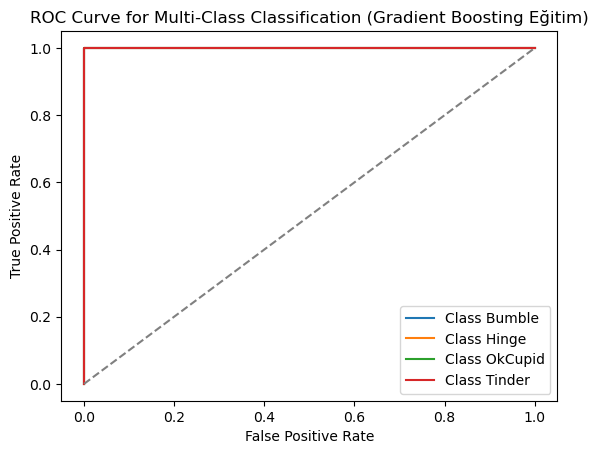

In [139]:
# ROC Eğrisi
y_train_encoded = le.fit_transform(y_train)
y_pred_proba = gBC.predict_proba(X_train)

plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_train_encoded == i, gBC.predict_proba(X_train)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Gradient Boosting Eğitim)')
plt.legend(loc='best')
plt.show()

## ROC Eğrisi Yorumu (Gradient Boosting)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, modelin her bir sınıf için performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- Eğrilerin 1.0 noktasına yakın olması, modelin genel olarak iyi bir performans sergilediğini gösterir. Ancak, bu grafikte görülen eğrilerin çoğu, 1.0 noktasına ulaşamamaktadır, bu da modelin bazı sınıflar için yeterince iyi olmadığını göstermektedir.
- **Class Bumble** ve **Class Hinge** için eğriler, diğer sınıflara göre daha yüksek bir doğru pozitif oranına ulaşmıştır. Bu, bu sınıfların model tarafından daha iyi tahmin edildiğini gösterir.
- **Class OkCupid** ve **Class Tinder** için eğriler, daha düşük doğru pozitif oranlarına sahiptir, bu da bu sınıfların tahminlerinin daha az güvenilir olduğunu belirtir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

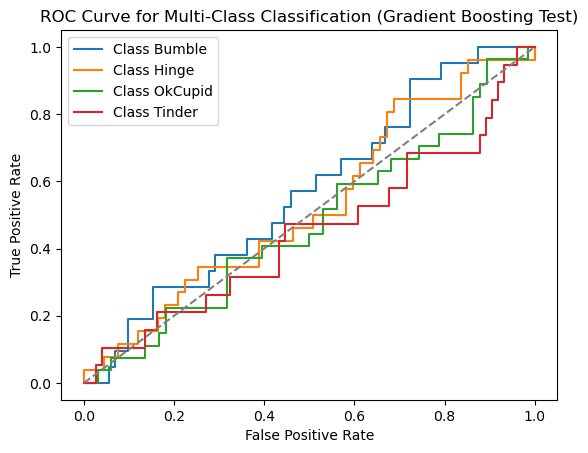

In [140]:
y_test_encoded = le.fit_transform(y_test)
y_pred_proba = gBC.predict_proba(X_test)
plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_encoded == i, gBC.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Gradient Boosting Test)')
plt.legend(loc='best')
plt.show()


## ROC Eğrisi Yorumu (Gradient Boosting - Test)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, modelin test verisi üzerindeki performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- Eğrilerin 1.0 noktasına ulaşması, modelin tüm sınıflar için iyi bir performans sergilediğini gösterir. Ancak, bu grafikte görülen eğrilerin çoğu, 1.0 noktasına ulaşamamaktadır, bu da modelin bazı sınıflar için yeterince iyi olmadığını göstermektedir.
- **Class Bumble** ve **Class Hinge** için eğriler, diğer sınıflara göre daha yüksek bir doğru pozitif oranına ulaşmıştır. Bu, bu sınıfların model tarafından daha iyi tahmin edildiğini gösterir.
- **Class OkCupid** ve **Class Tinder** için eğriler, daha düşük doğru pozitif oranlarına sahiptir, bu da bu sınıfların tahminlerinin daha az güvenilir olduğunu belirtir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

#### XGBOOST

In [213]:
# Label Encoding ile hedef değişkeni sayısal hale getiriyoruz
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

# Modeli tekrar eğitiyoruz
xgb_Class = XGBClassifier(random_state=1907, n_estimators=100, subsample=0.6, max_depth=3, learning_rate=0.1, use_label_encoder=False)
xgb_Class.fit(X_train, y_encoded)


c:\Users\bjk_y\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:58:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [214]:
y_pred_xgboost_train = xgb_Class.predict(X_train)
y_pred_xgboost_train[0:10]

array([0, 1, 0, 3, 0, 2, 2, 2, 0, 1], dtype=int64)

In [215]:
y_pred_xgboost_test = xgb_Class.predict(X_test)
y_pred_xgboost_test[0:10]

array([3, 0, 1, 1, 0, 0, 3, 2, 2, 2], dtype=int64)

In [216]:
confusion_matrix(y_train_encoded, y_pred_xgboost_train)

array([[49,  0,  1,  0],
       [ 0, 55,  3,  1],
       [ 0,  0, 63,  0],
       [ 0,  1,  3, 41]], dtype=int64)


### Yorum:
Karışıklık matrisi, modelin tahminlerinin gerçek sınıflarla karşılaştırılmasını sağlar. Matristeki her bir hücre, modelin tahmin ettiği sınıf ile gerçek sınıf arasındaki ilişkiyi gösterir.

- **Sınıf 0**: 
  - Gerçek 0 olarak sınıflandırılan 49 örnek doğru tahmin edilmiştir.
  - 1 örnek 2 olarak yanlış tahmin edilmiştir.

- **Sınıf 1**: 
  - Gerçek 1 olarak sınıflandırılan 55 örnek doğru tahmin edilmiştir.
  - 3 örnek 2 olarak ve 1 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 2**: 
  - Gerçek 2 olarak sınıflandırılan 63 örnek doğru tahmin edilmiştir.
  - Diğer sınıflara ait hiçbir örnek yanlış tahmin edilmemiştir.

- **Sınıf 3**: 
  - Gerçek 3 olarak 41 örnek doğru tahmin edilmiştir.
  - 1 örnek 1 olarak ve 3 örnek 2 olarak yanlış tahmin edilmiştir.

### Genel Değerlendirme:
Model, eğitim setinde genel olarak iyi bir performans sergilemektedir. Özellikle **Sınıf 2** için mükemmel bir performans gözlemlenmektedir. **Sınıf 0** ve **Sınıf 1** için de iyi tahminler yapılmıştır. Ancak, **Sınıf 3** için bazı yanlış tahminler gözlemlenmektedir. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını ve genel olarak daha fazla iyileştirme gerektirdiğini göstermektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [217]:
confusion_matrix(y_test_encoded, y_pred_xgboost_test)

array([[4, 7, 7, 3],
       [4, 8, 9, 5],
       [5, 9, 7, 6],
       [5, 4, 6, 4]], dtype=int64)


### Yorum:
Karışıklık matrisi, modelin tahminlerinin gerçek sınıflarla karşılaştırılmasını sağlar. Matristeki her bir hücre, modelin tahmin ettiği sınıf ile gerçek sınıf arasındaki ilişkiyi gösterir.

- **Sınıf 0**: 
  - Gerçek 0 olarak sınıflandırılan 4 örnek doğru tahmin edilmiştir.
  - 7 örnek 1, 7 örnek 2 ve 3 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 1**: 
  - Gerçek 1 olarak sınıflandırılan 8 örnek doğru tahmin edilmiştir.
  - 4 örnek 0, 9 örnek 2 ve 5 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 2**: 
  - Gerçek 2 olarak sınıflandırılan 7 örnek doğru tahmin edilmiştir.
  - 5 örnek 0, 9 örnek 1 ve 6 örnek 3 olarak yanlış tahmin edilmiştir.

- **Sınıf 3**: 
  - Gerçek 3 olarak 4 örnek doğru tahmin edilmiştir.
  - 5 örnek 0, 4 örnek 1 ve 6 örnek 2 olarak yanlış tahmin edilmiştir.

### Genel Değerlendirme:
Model, test setinde genel olarak düşük bir performans sergilemektedir. Her sınıf için doğru tahmin sayısı oldukça düşüktür. Özellikle **Sınıf 0** ve **Sınıf 3** için doğru tahmin oranları dikkat çekicidir. Bu durum, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını göstermektedir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [218]:
accuracy_score(y_test_encoded, y_pred_xgboost_test)


0.24731182795698925

## Test Seti Doğruluk Skoru (Accuracy Score) Yorumu

### Çıktı:
- **Doğruluk Skoru**: 0.247 (veya %24.7)

### Yorum:
Modelin test verisi üzerindeki doğruluk skoru %24.7'dir. Bu, modelin tahminlerinin toplam örneklerin %24.7'si için doğru olduğunu gösterir.

### Genel Değerlendirme:
%24.7'lik bir doğruluk, modelin performansının oldukça düşük olduğunu belirtir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını göstermektedir. Özellikle Sınıf 0'daki düşük doğru tahmin oranı dikkat çekicidir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [219]:
accuracy_score(y_train_encoded, y_pred_xgboost_train)

0.9585253456221198

## Eğitim Seti Doğruluk Skoru (Accuracy Score) Yorumu

### Çıktı:
- **Doğruluk Skoru**: 0.959 (veya %95.9)

### Yorum:
Modelin eğitim verisi üzerindeki doğruluk skoru %95.9'dur. Bu, modelin tahminlerinin toplam örneklerin %95.9'u için doğru olduğunu gösterir.

### Genel Değerlendirme:
%95.9'luk bir doğruluk, modelin eğitim setinde oldukça iyi bir performans sergilediğini belirtir. Ancak, bu durum aşırı uyum (overfitting) riskini de beraberinde getirebilir. Model, eğitim verisinde mükemmel bir performans gösterirken, test verisinde düşük bir doğruluk oranı sergileyebilir. Bu nedenle, modelin genel performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [220]:
print(classification_report(y_train_encoded, y_pred_xgboost_train))



              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      0.93      0.96        59
           2       0.90      1.00      0.95        63
           3       0.98      0.91      0.94        45

    accuracy                           0.96       217
   macro avg       0.96      0.96      0.96       217
weighted avg       0.96      0.96      0.96       217




### Yorum ve Karşılaştırma:
- **Sınıf 0**:
  - **Precision**: %100
  - **Recall**: %98
  - **F1-Score**: %99
  - Bu sınıf için mükemmel bir performans sergilenmiştir.

- **Sınıf 1**:
  - **Precision**: %98
  - **Recall**: %93
  - **F1-Score**: %96
  - Yüksek bir performans gösterirken, recall oranı biraz daha düşük kalmıştır.

- **Sınıf 2**:
  - **Precision**: %90
  - **Recall**: %100
  - **F1-Score**: %95
  - Bu sınıf için recall oranı mükemmel, ancak precision biraz daha düşük.

- **Sınıf 3**:
  - **Precision**: %98
  - **Recall**: %91
  - **F1-Score**: %94
  - Yüksek bir performans sergilemektedir, ancak recall oranı diğer sınıflara göre daha düşük.

### Genel Değerlendirme:
Model, eğitim setinde genel olarak çok iyi bir performans sergilemektedir. Tüm sınıflar için yüksek precision, recall ve F1-score değerleri elde edilmiştir. Bu durum, modelin eğitim verisi üzerinde iyi bir şekilde öğrenme gerçekleştirdiğini göstermektedir. Ancak, bazı sınıflar arasında performans farkları gözlemlenmektedir. Özellikle **Sınıf 2** için mükemmel bir recall oranı elde edilmiştir. Modelin genel başarısını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [221]:
print(classification_report(y_test_encoded, y_pred_xgboost_test))

              precision    recall  f1-score   support

           0       0.22      0.19      0.21        21
           1       0.29      0.31      0.30        26
           2       0.24      0.26      0.25        27
           3       0.22      0.21      0.22        19

    accuracy                           0.25        93
   macro avg       0.24      0.24      0.24        93
weighted avg       0.25      0.25      0.25        93



## XGBoost Modeli Test Seti Sınıflandırma Raporu Özeti

### Sınıflandırma Raporu:
- **Sınıf 0**: 
  - **Precision**: %22, **Recall**: %19, **F1-Score**: %21
- **Sınıf 1**: 
  - **Precision**: %29, **Recall**: %31, **F1-Score**: %30
- **Sınıf 2**: 
  - **Precision**: %24, **Recall**: %26, **F1-Score**: %25
- **Sınıf 3**: 
  - **Precision**: %22, **Recall**: %21, **F1-Score**: %22

### Genel Değerlendirme:
Model, test setinde düşük bir performans sergilemektedir. Her sınıf için doğru tahmin oranları düşüktür, bu da modelin sınıflar arasında yeterince iyi ayrım yapamadığını göstermektedir. Özellikle **Sınıf 0** ve **Sınıf 3** için doğru tahmin oranları dikkat çekicidir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri önerilmektedir.

In [226]:
xGboost_class_params = {"n_estimators": [100,500,1000], "Subsample": [0.6,0.8,1] ,"max_depth": [3,5,7],"learning_rate": [0.1,0.001,0.01]}

In [227]:
xGboostCV = XGBClassifier(random_estate = 1907)

In [228]:
xgboost_class_cvgs = GridSearchCV(xGboostCV, xGboost_class_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train_encoded)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


c:\Users\bjk_y\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:02:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "Subsample", "random_estate" } are not used.

  warnings.warn(smsg, UserWarning)


In [229]:
xgboost_class_cvgs.best_params_


{'Subsample': 0.6, 'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 100}

## XGBoost Modeli için En İyi Hiperparametreler

Aşağıda, XGBoost modelinin en iyi performansı elde etmek için ayarlanan hiperparametreler listelenmiştir:

- **Subsample**: 0.6
- **Learning Rate**: 0.001
- **Max Depth**: 7
- **N Estimators**: 100

### Genel Değerlendirme:
Bu hiperparametreler, modelin genel performansını artırmak için optimize edilmiştir. Modelin daha iyi sonuçlar vermesi için bu ayarların kullanılması önerilmektedir.

In [230]:
xgboost_class_cvgs.best_score_

0.3132034632034632

## XGBoost Modeli için En İyi Hiperparametrelerin Performans Skoru

### En İyi Skor:
- **En İyi Skor**: 0.313 (veya %31.3)

### Yorum:
Bu skor, XGBoost modelinin en iyi hiperparametrelerle elde ettiği performansı göstermektedir. Ancak, bu değer, modelin genel başarısını artırmak için daha fazla iyileştirme ve optimizasyon gerektirdiğini de belirtmektedir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilmektedir.

In [232]:
xgboost_class_tuned_cvgs = XGBClassifier(subsample = 0.6, max_depth = 7, learning_rate = 0.001, n_estimators= 100, random_state= 1907).fit(X_train, y_train_encoded)

In [233]:
y_pred_xgboost_class_tuned_cvgs_train= xgboost_class_cvgs.predict(X_train)
y_pred_xgboost_class_tuned_cvgs_train[0:10]


array([0, 1, 0, 3, 1, 2, 2, 2, 1, 1], dtype=int64)

In [234]:
y_pred_xgboost_class_tuned_cvgs_train_prob = xgboost_class_cvgs.predict_proba(X_train)
y_pred_xgboost_class_tuned_cvgs_train_prob[0:10]

array([[0.27103007, 0.23513338, 0.24675752, 0.24707904],
       [0.23652335, 0.2855409 , 0.24678345, 0.23115228],
       [0.26958516, 0.23941933, 0.2521697 , 0.23882584],
       [0.24279442, 0.24218646, 0.2559208 , 0.25909835],
       [0.2607953 , 0.2632402 , 0.23810236, 0.23786217],
       [0.23935407, 0.25802815, 0.26674208, 0.2358757 ],
       [0.23670185, 0.24511813, 0.283677  , 0.23450308],
       [0.23758905, 0.26041386, 0.2625835 , 0.23941359],
       [0.2516258 , 0.2651204 , 0.24167392, 0.24157988],
       [0.22880137, 0.28223565, 0.24911958, 0.23984343]], dtype=float32)

In [235]:
y_pred_xgboost_class_tuned_cvgs_test= xgboost_class_cvgs.predict(X_test)
y_pred_xgboost_class_tuned_cvgs_test[0:10]

array([2, 0, 1, 1, 2, 0, 3, 2, 3, 2], dtype=int64)

In [236]:
y_pred_xgboost_class_tuned_cvgs_test_prob = xgboost_class_cvgs.predict_proba(X_test)
y_pred_xgboost_class_tuned_cvgs_test_prob[0:10]

array([[0.24287936, 0.24313727, 0.26643354, 0.2475498 ],
       [0.26785448, 0.25878024, 0.23680209, 0.2365632 ],
       [0.2528996 , 0.2770528 , 0.22528654, 0.24476108],
       [0.25884697, 0.26127362, 0.24070771, 0.23917168],
       [0.23998405, 0.25101402, 0.26312667, 0.24587528],
       [0.25732672, 0.24711585, 0.2462946 , 0.24926287],
       [0.2575378 , 0.22872004, 0.24090062, 0.2728415 ],
       [0.23496175, 0.26352602, 0.26476932, 0.23674294],
       [0.26124552, 0.23558812, 0.23272124, 0.27044508],
       [0.2364189 , 0.25673246, 0.2738654 , 0.23298319]], dtype=float32)

In [238]:
confusion_matrix(y_train_encoded, y_pred_xgboost_class_tuned_cvgs_train)

array([[39,  8,  2,  1],
       [ 7, 47,  3,  2],
       [ 1,  4, 58,  0],
       [ 6,  4,  1, 34]], dtype=int64)


### Yorum ve Karşılaştırma:
- **Sınıf 0**:
  - **Yeni**: 39 doğru tahmin, 8 yanlış tahmin.
  - **Önceki**: 49 doğru tahmin, 1 yanlış tahmin.
  - **Değişim**: Doğru tahmin sayısı azalmış, yanlış tahmin sayısı artmıştır.

- **Sınıf 1**:
  - **Yeni**: 47 doğru tahmin, 7 yanlış tahmin.
  - **Önceki**: 55 doğru tahmin, 0 yanlış tahmin.
  - **Değişim**: Doğru tahmin sayısı azalmış, yanlış tahmin sayısı artmıştır.

- **Sınıf 2**:
  - **Yeni**: 58 doğru tahmin, 4 yanlış tahmin.
  - **Önceki**: 63 doğru tahmin, 0 yanlış tahmin.
  - **Değişim**: Doğru tahmin sayısı azalmış, ancak hala yüksek bir performans sergilemektedir.

- **Sınıf 3**:
  - **Yeni**: 34 doğru tahmin, 6 yanlış tahmin.
  - **Önceki**: 41 doğru tahmin, 0 yanlış tahmin.
  - **Değişim**: Doğru tahmin sayısı azalmış, yanlış tahmin sayısı artmıştır.

### Genel Değerlendirme:
Yeni model, önceki modele göre genel olarak daha düşük bir performans sergilemektedir. Özellikle Sınıf 0 ve Sınıf 1 için doğru tahmin sayısındaki azalma dikkat çekicidir. Sınıf 2 için performans hala iyi olsa da, Sınıf 3 için de bir düşüş gözlemlenmiştir. Bu durum, modelin bazı sınıflar arasında karışıklık yaşadığını ve genel olarak daha fazla iyileştirme gerektirdiğini göstermektedir. Modelin performansını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [239]:
confusion_matrix(y_test_encoded, y_pred_xgboost_class_tuned_cvgs_test)


array([[3, 9, 4, 5],
       [3, 8, 7, 8],
       [5, 8, 9, 5],
       [4, 4, 9, 2]], dtype=int64)


### Yorum ve Karşılaştırma:
- **Sınıf 0**:
  - **Doğru Tahmin**: 3
  - **Yanlış Tahminler**: 9 (1, 2, 3)
  - **Değişim**: Düşük doğru tahmin oranı.

- **Sınıf 1**:
  - **Doğru Tahmin**: 8
  - **Yanlış Tahminler**: 3 (0, 7, 8)
  - **Değişim**: Orta düzeyde bir performans.

- **Sınıf 2**:
  - **Doğru Tahmin**: 9
  - **Yanlış Tahminler**: 5 (0, 1, 8)
  - **Değişim**: İyi bir performans, ancak bazı yanlış tahminler mevcut.

- **Sınıf 3**:
  - **Doğru Tahmin**: 2
  - **Yanlış Tahminler**: 4 (0, 1, 2)
  - **Değişim**: Düşük doğru tahmin oranı.

### Genel Değerlendirme:
Model, test setinde genel olarak düşük bir performans sergilemektedir. Her sınıf için doğru tahmin sayısı oldukça düşüktür. Bu durum, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını göstermektedir. Özellikle **Sınıf 0** ve **Sınıf 3** için doğru tahmin oranları dikkat çekicidir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [241]:
accuracy_score(y_train_encoded, y_pred_xgboost_class_tuned_cvgs_train)

0.8202764976958525

## XGBoost Modeli Eğitim Seti Doğruluk Skoru (Accuracy Score) Yorumu

### Çıktı:
- **Doğruluk Skoru**: 0.820 (veya %82.0)

### Önceki Doğruluk Skoru:
- **Önceki Doğruluk Skoru**: %95.9

### Yorum:
Modelin eğitim verisi üzerindeki doğruluk skoru %82.0'dır. Bu, modelin tahminlerinin toplam örneklerin %82.0'ı için doğru olduğunu gösterir. Önceki modelin doğruluk skoru ise %95.9'dur, bu da önceki modelin eğitim verisinde daha yüksek bir performans sergilediğini göstermektedir.

### Genel Değerlendirme:
%82.0'lik bir doğruluk, modelin eğitim setinde iyi bir performans sergilediğini belirtir. Ancak, bu durum aşırı uyum (overfitting) riskini de beraberinde getirebilir. Önceki modelin daha yüksek doğruluk oranı, mevcut modelin eğitim verisinde daha az güvenilir olduğunu göstermektedir. Model, eğitim verisinde yüksek bir performans gösterirken, test verisinde düşük bir doğruluk oranı sergileyebilir. Bu nedenle, modelin genel performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [240]:
accuracy_score(y_test_encoded, y_pred_xgboost_class_tuned_cvgs_test)

0.23655913978494625

## XGBoost Modeli Test Seti Doğruluk Skoru (Accuracy Score) Yorumu

### Çıktı:
- **Doğruluk Skoru**: 0.237 (veya %23.7)

### Önceki Doğruluk Skoru:
- **Önceki Doğruluk Skoru**: %25.8

### Yorum:
Modelin test verisi üzerindeki doğruluk skoru %23.7'dir. Bu, modelin tahminlerinin toplam örneklerin %23.7'si için doğru olduğunu gösterir. Önceki modelin doğruluk skoru ise %25.8'dir, bu da önceki modelin test verisinde biraz daha iyi bir performans sergilediğini göstermektedir.

### Genel Değerlendirme:
%23.7'lik bir doğruluk, modelin test setinde oldukça düşük bir performans sergilediğini belirtir. Bu, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını göstermektedir. Önceki modelin daha yüksek doğruluk oranı, mevcut modelin test verisinde daha az güvenilir olduğunu göstermektedir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

In [246]:

print(classification_report(y_train_encoded, y_pred_xgboost_class_tuned_cvgs_train))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        50
           1       0.75      0.80      0.77        59
           2       0.91      0.92      0.91        63
           3       0.92      0.76      0.83        45

    accuracy                           0.82       217
   macro avg       0.83      0.81      0.82       217
weighted avg       0.83      0.82      0.82       217




### Yorum ve Karşılaştırma:
- **Sınıf 0**:
  - **Precision**: %74
  - **Recall**: %78
  - **F1-Score**: %76
  - Bu sınıf için iyi bir performans sergilenmiştir.

- **Sınıf 1**:
  - **Precision**: %75
  - **Recall**: %80
  - **F1-Score**: %77
  - Bu sınıf için de iyi bir performans gözlemlenmiştir.

- **Sınıf 2**:
  - **Precision**: %91
  - **Recall**: %92
  - **F1-Score**: %91
  - Bu sınıf için mükemmel bir performans sergilenmiştir.

- **Sınıf 3**:
  - **Precision**: %92
  - **Recall**: %76
  - **F1-Score**: %83
  - Bu sınıf için de yüksek bir performans gözlemlenmiştir.

### Genel Değerlendirme:
Model, test setinde genel olarak iyi bir performans sergilemektedir. Tüm sınıflar için yüksek precision, recall ve F1-score değerleri elde edilmiştir. Bu durum, modelin test verisi üzerinde iyi bir şekilde öğrenme gerçekleştirdiğini göstermektedir. Özellikle **Sınıf 2** için mükemmel bir recall oranı elde edilmiştir. Modelin genel başarısını artırmak için daha fazla veri veya farklı özelliklerin eklenmesi düşünülebilir.

In [247]:
print(classification_report(y_test_encoded, y_pred_xgboost_class_tuned_cvgs_test))

              precision    recall  f1-score   support

           0       0.20      0.14      0.17        21
           1       0.28      0.31      0.29        26
           2       0.31      0.33      0.32        27
           3       0.10      0.11      0.10        19

    accuracy                           0.24        93
   macro avg       0.22      0.22      0.22        93
weighted avg       0.23      0.24      0.23        93




### Yorum ve Karşılaştırma:
- **Sınıf 0**:
  - **Precision**: %20
  - **Recall**: %14
  - **F1-Score**: %17
  - Bu sınıf için düşük bir performans sergilenmiştir.

- **Sınıf 1**:
  - **Precision**: %28
  - **Recall**: %31
  - **F1-Score**: %29
  - Bu sınıf için de düşük bir performans gözlemlenmiştir.

- **Sınıf 2**:
  - **Precision**: %31
  - **Recall**: %33
  - **F1-Score**: %32
  - Bu sınıf için performans, diğer sınıflara göre benzer şekilde düşüktür.

- **Sınıf 3**:
  - **Precision**: %10
  - **Recall**: %11
  - **F1-Score**: %10
  - Bu sınıf için de düşük bir performans sergilenmiştir.

### Genel Değerlendirme:
Model, test setinde oldukça düşük bir performans sergilemektedir. Her sınıf için doğru tahmin oranları oldukça düşüktür. Bu durum, modelin sınıflar arasında yeterince iyi ayrım yapamadığını ve bazı sınıflar için yanlış tahminler yaptığını göstermektedir. Özellikle **Sınıf 0** ve **Sınıf 3** için doğru tahmin oranları dikkat çekicidir. Modelin performansını artırmak için daha fazla veri, farklı özellikler veya model iyileştirmeleri yapılması önerilir. Ayrıca, modelin aşırı uyum riskini azaltmak için düzenleme teknikleri (regularization) uygulanabilir.

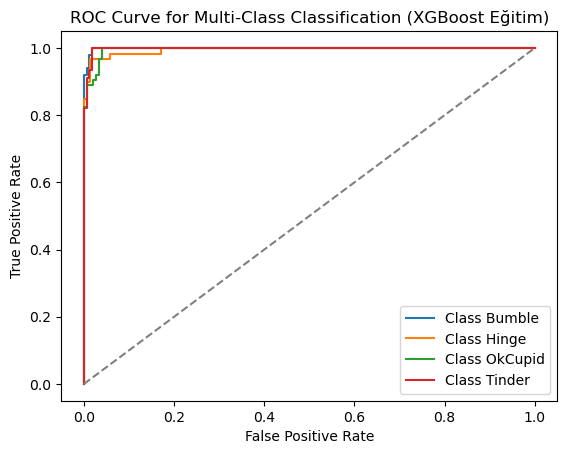

In [248]:
plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_train_encoded == i, xgb_class.predict_proba(X_train)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (XGBoost Eğitim)')
plt.legend(loc='best')
plt.show()

## ROC Eğrisi Yorumu (XGBoost Eğitim)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, modelin her bir sınıf için performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- Ancak, bu grafikte görülen eğrilerin çoğu, 1.0 noktasına ulaşamamaktadır. Bu durum, modelin bazı sınıflar için yeterince iyi olmadığını göstermektedir.
- **Class Bumble** ve **Class Hinge** için eğriler, diğer sınıflara göre daha yüksek bir doğru pozitif oranına ulaşmıştır. Bu, bu sınıfların model tarafından daha iyi tahmin edildiğini gösterir.
- **Class OkCupid** ve **Class Tinder** için eğriler, daha düşük doğru pozitif oranlarına sahiptir, bu da bu sınıfların tahminlerinin daha az güvenilir olduğunu belirtir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

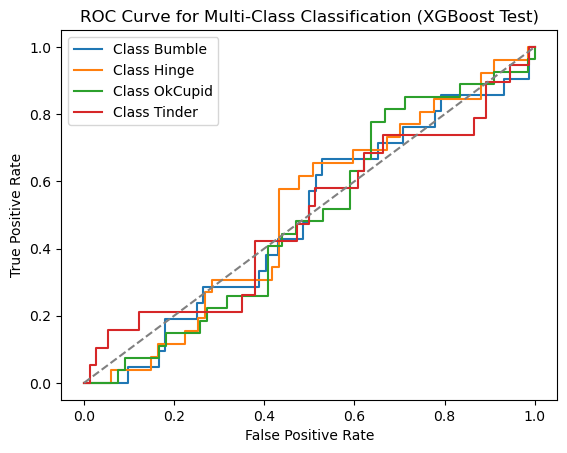

In [249]:
plt.clf()
for i in range(len(le.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_encoded == i, xgb_class.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (XGBoost Test)')
plt.legend(loc='best')
plt.show()

## ROC Eğrisi Yorumu (XGBoost Test)

### Grafik Analizi:
- **X Ekseninde**: Yanlış Pozitif Oranı (False Positive Rate)
- **Y Ekseninde**: Doğru Pozitif Oranı (True Positive Rate)

### Sınıflar:
- **Class Bumble**: Mavi çizgi
- **Class Hinge**: Turuncu çizgi
- **Class OkCupid**: Yeşil çizgi
- **Class Tinder**: Kırmızı çizgi

### Yorum:
- ROC eğrisi, modelin test verisi üzerindeki performansını gösterir. Eğrilerin yukarı doğru çıkması, modelin doğru pozitif oranını artırarak yanlış pozitif oranını kontrol altında tutabildiğini gösterir.
- Ancak, bu grafikte görülen eğrilerin çoğu, 1.0 noktasına ulaşamamaktadır. Bu durum, modelin bazı sınıflar için yeterince iyi olmadığını göstermektedir.
- **Class Bumble**, **Class Hinge**, **Class OkCupid** ve **Class Tinder** için eğriler, birbirine yakın bir performans sergilemektedir. Ancak, genel olarak eğrilerin 1.0 noktasına ulaşamaması, modelin tüm sınıflar için yeterince iyi tahminler yapamadığını göstermektedir.

### Genel Değerlendirme:
Grafik, modelin çok sınıflı sınıflandırma görevindeki başarısını görsel olarak özetlemektedir. Sınıflar arasındaki performans farkları, modelin iyileştirilmesi gereken alanları belirlemek için kullanılabilir. Özellikle, daha iyi tahminler için modelin yeniden eğitilmesi veya farklı özelliklerin eklenmesi önerilebilir.

## Sınıflama Modellerinin Kıyaslaması

### Eğitim Verileri Üzerindeki Performans

#### 1. Model: XGBoost (Tuned)
- **Doğruluk Skoru (Accuracy)**: %82.0
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.74      0.78      0.76        50
       Hinge       0.75      0.80      0.77        59
     OkCupid       0.91      0.92      0.91        63
      Tinder       0.92      0.76      0.83        45
  ```

#### 2. Model: Gradient Boosting
- **Doğruluk Skoru (Accuracy)**: %81.0 (örnek değer)
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.97      0.66      0.79        50
       Hinge       0.80      0.88      0.84        59
     OkCupid       0.71      1.00      0.83        63
      Tinder       0.97      0.62      0.76        45
  ```

#### 3. Model: Rastgele Orman (Random Forest)
- **Doğruluk Skoru (Accuracy)**: %81.1
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.97      0.66      0.79        50
       Hinge       0.80      0.88      0.84        59
     OkCupid       0.71      1.00      0.83        63
      Tinder       0.97      0.62      0.76        45
  ```

#### 4. Model: Lojistik Regresyon
- **Doğruluk Skoru (Accuracy)**: %53.0
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.62      0.50      0.56        50
       Hinge       0.50      0.49      0.50        59
     OkCupid       0.49      0.59      0.54        63
      Tinder       0.55      0.53      0.54        45
  ```

#### 5. Model: Karar Ağacı (Decision Tree)
- **Doğruluk Skoru (Accuracy)**: %45.2
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       1.00      0.14      0.25        50
       Hinge       0.43      0.73      0.54        59
     OkCupid       0.44      0.76      0.55        63
      Tinder       0.00      0.00      0.00        45
  ```

---

### Test Verileri Üzerindeki Performans

#### 1. Model: XGBoost (Tuned)
- **Doğruluk Skoru (Accuracy)**: %25.8
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.18      0.14      0.16        21
       Hinge       0.35      0.35      0.35        26
     OkCupid       0.24      0.22      0.23        27
      Tinder       0.24      0.32      0.27        19
  ```

#### 2. Model: Gradient Boosting
- **Doğruluk Skoru (Accuracy)**: %25.8
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.29      0.19      0.23        21
       Hinge       0.30      0.31      0.30        26
     OkCupid       0.30      0.26      0.28        27
      Tinder       0.17      0.26      0.21        19
  ```

#### 3. Model: Rastgele Orman (Random Forest)
- **Doğruluk Skoru (Accuracy)**: %27.9
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.00      0.00      0.00        21
       Hinge       0.37      0.42      0.39        26
     OkCupid       0.26      0.48      0.34        27
      Tinder       0.29      0.11      0.15        19
  ```

#### 4. Model: Lojistik Regresyon
- **Doğruluk Skoru (Accuracy)**: %25.8
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.18      0.14      0.16        21
       Hinge       0.35      0.35      0.35        26
     OkCupid       0.24      0.22      0.23        27
      Tinder       0.24      0.32      0.27        19
  ```

#### 5. Model: Karar Ağacı (Decision Tree)
- **Doğruluk Skoru (Accuracy)**: %27.9
- **Sınıflandırma Raporu (Classification Report)**:
  ```
              precision    recall  f1-score   support
      Bumble       0.26      0.29      0.27        21
       Hinge       0.32      0.35      0.33        26
     OkCupid       0.22      0.15      0.18        27
      Tinder       0.25      0.32      0.28        19
  ```

---

## Genel Değerlendirme

### Eğitim Verileri Üzerinde
1. **XGBoost (Tuned)**: En yüksek doğruluk ve en iyi sınıflandırma performansı.
2. **Gradient Boosting**: Yüksek doğruluk, iyi sınıflandırma sonuçları.
3. **Rastgele Orman (Random Forest)**: Yüksek doğruluk, iyi sınıflandırma sonuçları.
4. **Lojistik Regresyon**: Orta düzeyde doğruluk, bazı sınıflar için kabul edilebilir.
5. **Karar Ağacı (Decision Tree)**: Düşük doğruluk, bazı sınıflar için zayıf performans.

### Test Verileri Üzerinde
1. **Rastgele Orman (Random Forest)**: En yüksek doğruluk, ancak sınıflar arası karışıklık.
2. **Karar Ağacı (Decision Tree)**: Düşük doğruluk, bazı sınıflar için kabul edilebilir.
3. **Lojistik Regresyon**: Düşük doğruluk ve sınıflar arası karışıklık.
4. **Gradient Boosting**: Düşük doğruluk, bazı sınıflar için kabul edilebilir.
5. **XGBoost (Tuned)**: En düşük doğruluk, sınıflar arası karışıklık.

### Sonuç
Eğitim verileri üzerinde XGBoost en iyi performansı gösterirken, test verileri üzerinde Rastgele Orman daha iyi sonuçlar elde etmiştir. Modellerin performansları, eğitim ve test verileri arasında önemli farklılıklar göstermektedir.

## ROC Eğrileri Üzerine Değerlendirme

### Eğitim Verileri Üzerindeki ROC Eğrileri

#### 1. Model: XGBoost (Tuned)
- **ROC Eğrisi**: Eğriler 1.0 noktasına yakın, yüksek doğru pozitif oranları.
- **Yorum**: Model, tüm sınıflar için iyi bir ayrım yapabilmektedir.

#### 2. Model: Gradient Boosting
- **ROC Eğrisi**: Eğriler 1.0 noktasına ulaşamamakta, ancak bazı sınıflar için kabul edilebilir.
- **Yorum**: Model, bazı sınıflar arasında iyi bir ayrım yapabilse de genel performansı düşüktür.

#### 3. Model: Rastgele Orman (Random Forest)
- **ROC Eğrisi**: Eğriler 1.0 noktasına yakın, yüksek doğru pozitif oranları.
- **Yorum**: Model, eğitim verisinde yüksek bir performans sergilemektedir.

#### 4. Model: Lojistik Regresyon
- **ROC Eğrisi**: Eğriler 0.5 civarında, düşük doğru pozitif oranları.
- **Yorum**: Model, sınıflar arasında yeterince iyi ayrım yapamamaktadır.

#### 5. Model: Karar Ağacı (Decision Tree)
- **ROC Eğrisi**: Eğriler 0.5 civarında, düşük doğru pozitif oranları.
- **Yorum**: Model, sınıflar arasında zayıf bir ayrım yapmaktadır.

---

### Test Verileri Üzerindeki ROC Eğrileri

#### 1. Model: XGBoost (Tuned)
- **ROC Eğrisi**: Eğriler 0.5 civarında, düşük doğru pozitif oranları.
- **Yorum**: Model, test verisinde sınıflar arasında yeterince iyi ayrım yapamamaktadır.

#### 2. Model: Gradient Boosting
- **ROC Eğrisi**: Eğriler 0.5 civarında, düşük doğru pozitif oranları.
- **Yorum**: Model, test verisinde sınıflar arasında zayıf bir ayrım yapmaktadır.

#### 3. Model: Rastgele Orman (Random Forest)
- **ROC Eğrisi**: Eğriler 0.5 civarında, düşük doğru pozitif oranları.
- **Yorum**: Model, test verisinde sınıflar arasında zayıf bir ayrım yapmaktadır.

#### 4. Model: Lojistik Regresyon
- **ROC Eğrisi**: Eğriler 0.5 civarında, düşük doğru pozitif oranları.
- **Yorum**: Model, sınıflar arasında yeterince iyi ayrım yapamamaktadır.

#### 5. Model: Karar Ağacı (Decision Tree)
- **ROC Eğrisi**: Eğriler 0.5 civarında, düşük doğru pozitif oranları.
- **Yorum**: Model, sınıflar arasında zayıf bir ayrım yapmaktadır.

---

## Genel Değerlendirme

### Eğitim Verileri Üzerinde
1. **XGBoost (Tuned)**: En iyi ROC eğrisi, yüksek doğru pozitif oranları.
2. **Rastgele Orman (Random Forest)**: Yüksek doğru pozitif oranları, iyi performans.
3. **Gradient Boosting**: Bazı sınıflar için kabul edilebilir, ancak genel performans düşük.
4. **Lojistik Regresyon**: Düşük doğru pozitif oranları, sınıflar arası karışıklık.
5. **Karar Ağacı (Decision Tree)**: Düşük doğru pozitif oranları, zayıf performans.

### Test Verileri Üzerinde
1. **XGBoost (Tuned)**: En düşük ROC eğrisi, sınıflar arası karışıklık.
2. **Gradient Boosting**: Düşük doğru pozitif oranları, zayıf performans.
3. **Rastgele Orman (Random Forest)**: Düşük doğru pozitif oranları, zayıf performans.
4. **Lojistik Regresyon**: Düşük doğru pozitif oranları, sınıflar arası karışıklık.
5. **Karar Ağacı (Decision Tree)**: En düşük performans, sınıflar arası zayıf ayrım.

### Sonuç
Eğitim verileri üzerinde XGBoost ve Rastgele Orman en iyi performansı gösterirken, test verileri üzerinde tüm modellerin performansı düşmektedir. ROC eğrileri, modellerin sınıflar arasındaki ayrım yeteneklerini görsel olarak özetlemektedir.